In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data=pd.read_csv('./mbti_1.csv')

In [3]:
data.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [6]:
df=pd.DataFrame(data)

In [7]:
df.isnull().sum() #thus no null values in the df

type     0
posts    0
dtype: int64

In [8]:
df.duplicated() #thus no duplicted values

0       False
1       False
2       False
3       False
4       False
        ...  
8670    False
8671    False
8672    False
8673    False
8674    False
Length: 8675, dtype: bool

# EXPLORATORY DATA ANALYSIS

### Number of unique personality types

In [9]:
types_count=data.type.value_counts()

In [10]:
types_count

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

### PIE CHART SHOWING THE DISTRIBUTION OF PERSONALITIES

AxesSubplot(0.125,0.185;0.775x0.62)


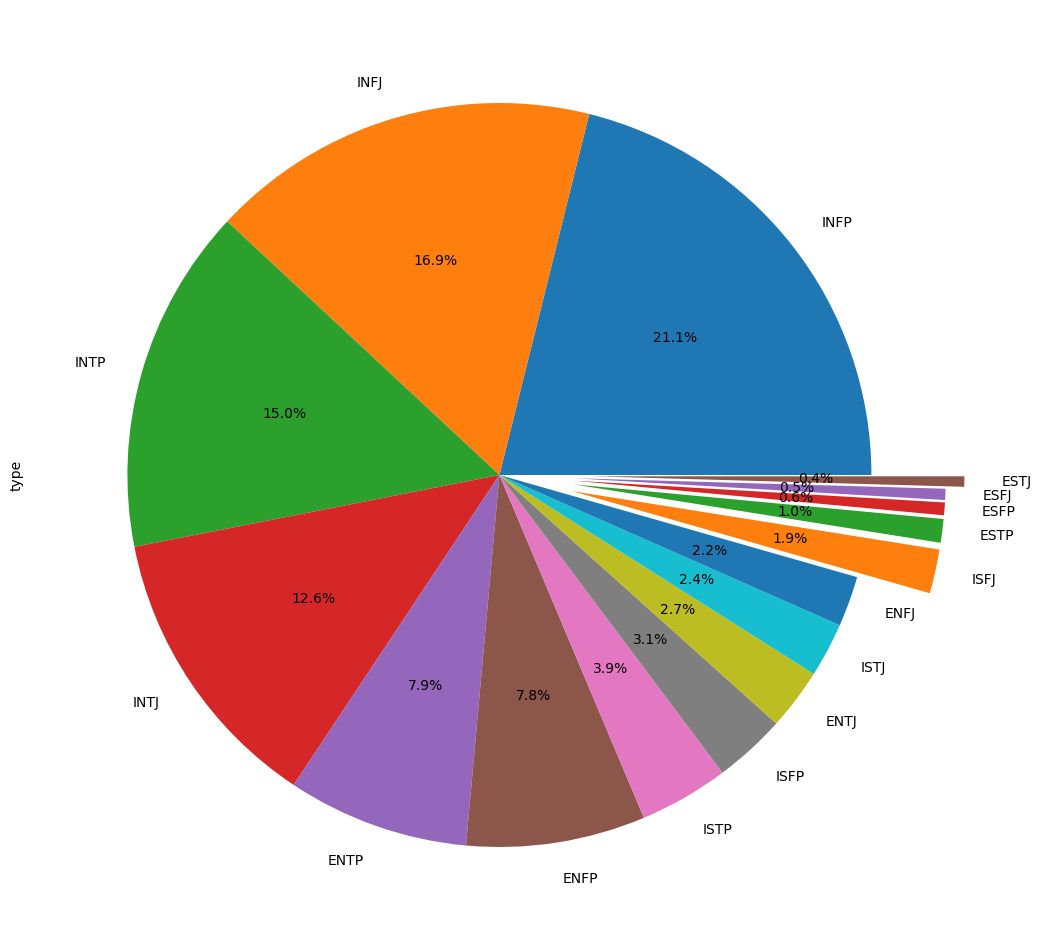

In [11]:
print(types_count.plot(kind='pie',autopct='%1.1f%%',figsize=(12,15),explode=[0,0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2,0.25]))

AxesSubplot(0.125,0.11;0.775x0.77)


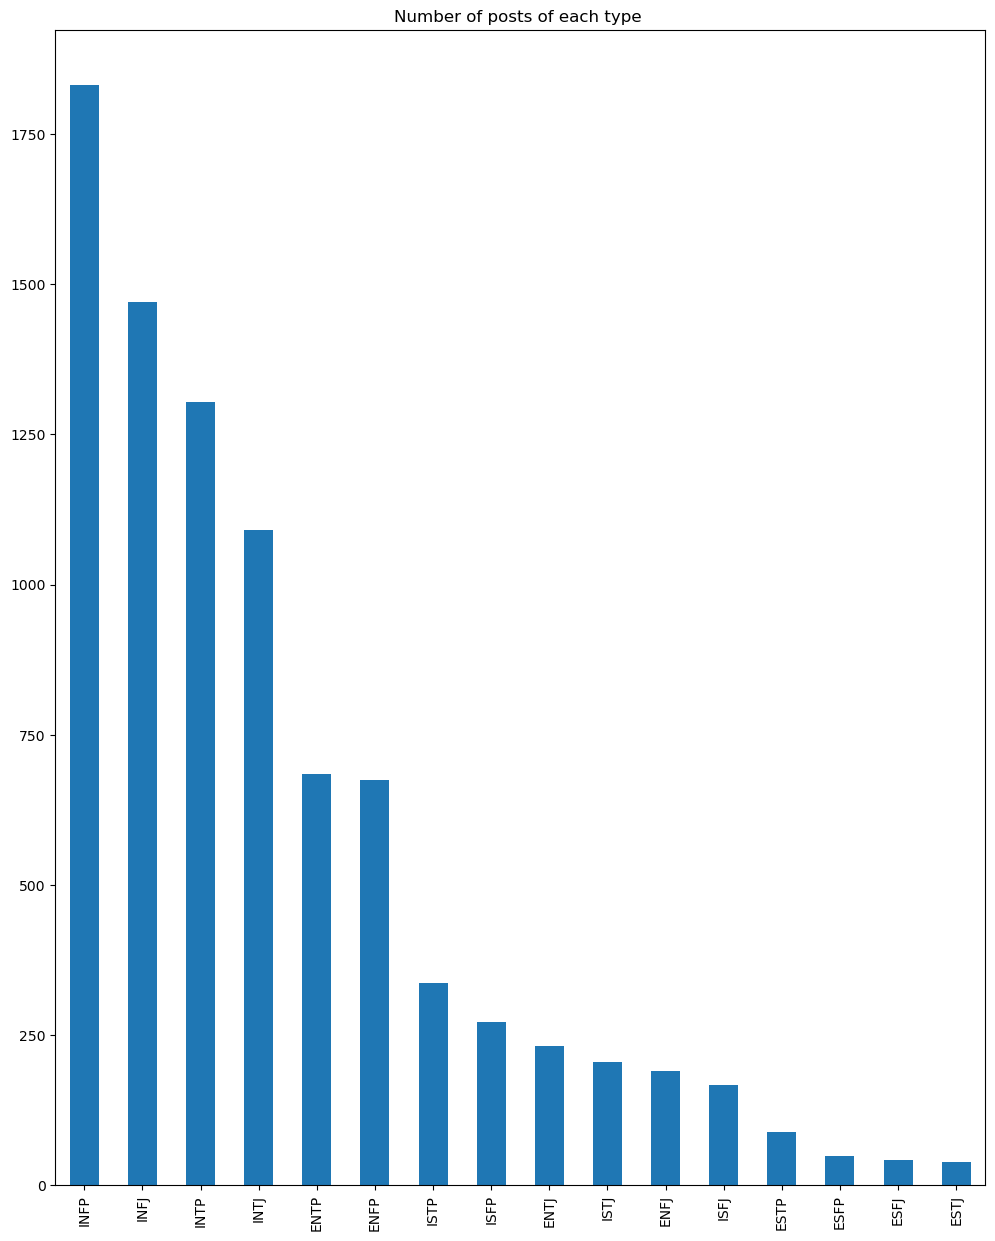

In [12]:
print(types_count.plot(kind='bar',figsize=(12,15),title='Number of posts of each type '))


In [13]:
posts=data["posts"].apply(len)

Text(0.5, 1.0, 'Length of posts in each type ')

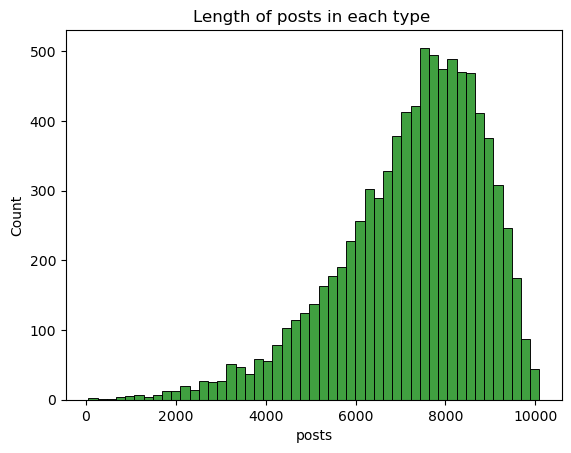

In [26]:
histogram=sns.histplot(posts,color='g')
histogram.set_title('Length of posts in each type ')


#### The fucntions to create additional columns for storing the personality type

In [27]:
def helper(list1, ch1, Type, ind):
    
    i=0
    for row in Type:
        if row[ind]==ch1:
            list1[i]=1
        else :
            list1[i]=0
        i= i+1
    return list1

'''This function takes dataset as input 
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''
#function to add columns for 4 type indicators
def Add_Types(data):
        IE = np.zeros(data.shape[0])
        NS = np.zeros(data.shape[0])
        TF = np.zeros(data.shape[0])
        JP = np.zeros(data.shape[0])

        Type= list(data["type"])

        IE= helper(IE, 'I', Type, 0)
        NS= helper(NS, 'N', Type, 1)
        TF= helper(TF, 'T', Type, 2)
        JP= helper(JP, 'J', Type, 3)


        data.insert(2, "IE", IE, True)
        data.insert(3, "NS", NS, True)
        data.insert(4, "TF", TF, True)
        data.insert(5, "JP", JP, True)

data2=data.copy(deep=True)
Add_Types(data2)


In [28]:
data2.head()

type                                              posts   IE   NS   TF   JP
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  1.0  1.0  0.0  1.0
1  ENTP  'I'm finding the lack of me in these posts ver...  0.0  1.0  1.0  0.0
2  INTP  'Good one  _____   https://www.youtube.com/wat...  1.0  1.0  1.0  0.0
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...  1.0  1.0  1.0  1.0
4  ENTJ  'You're fired.|||That's another silly misconce...  0.0  1.0  1.0  1.0

In [29]:
I=data2['IE'].value_counts()[0]
E=data2['IE'].value_counts()[1]
N=data2['NS'].value_counts()[0]
S=data2['NS'].value_counts()[1]
T=data2['TF'].value_counts()[0]
F=data2['TF'].value_counts()[1]
J=data2['JP'].value_counts()[0]
P=data2['JP'].value_counts()[1]

In [30]:
I,E,N,S,T,F,J,P

(1999, 6676, 1197, 7478, 4694, 3981, 5241, 3434)

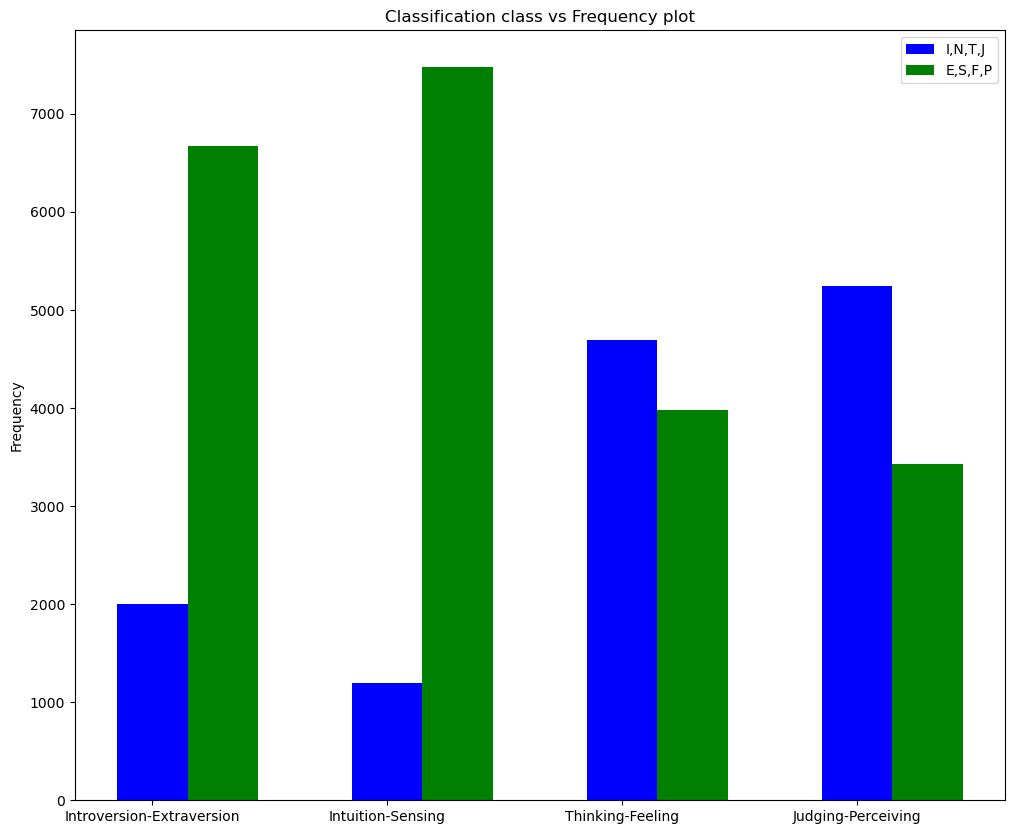

In [31]:
plt.figure(figsize=(12,10))

coordinates=np.arange(4)
plt.bar(coordinates-0.15,(I,N,T,J),0.3,label="I,N,T,J",color='blue',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.15,(E,S,F,P),0.3,label="E,S,F,P",color='green')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

## Correlation heatmap 

Correlation Matrix: 
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000
AxesSubplot(0.125,0.11;0.62x0.77)


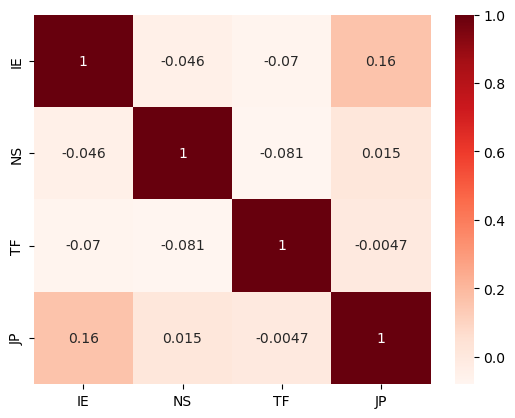

In [33]:
columns=['IE','NS','TF','JP']
correlation_matrix=data2[columns].corr()

print('Correlation Matrix: \n',correlation_matrix)
print(sns.heatmap(correlation_matrix,annot=True,cmap='Reds'))


In [34]:
data_copy=data2.copy()

In [35]:
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import time
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/priyanshumishra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
data_copy["posts"]=data_copy["posts"].str.lower()


In [37]:
# for i in range(data_copy.shape[0]):
    
#     post_temp=data_copy._get_value(i, 'posts')
#     pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     data_copy._set_value(i, 'posts',post_temp)
  
#     pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
#     post_temp=data_copy._get_value(i, 'posts')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     data_copy._set_value(i, 'posts',post_temp)

# #removing special characters and numbers from texts.
# for i in range(data_copy.shape[0]):
#     post_temp=data_copy._get_value(i, 'posts')
#     pattern = re.compile('\W+')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     pattern = re.compile(r'[0-9]')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     pattern = re.compile(r'[_+]')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     data_copy._set_value(i, 'posts',post_temp)

# #removing extra spaces from texts.
# for i in range(data_copy.shape[0]):
#     post_temp=data_copy._get_value(i, 'posts')
#     pattern = re.compile('\s+')
#     post_temp= re.sub(pattern, ' ', post_temp)
#     data_copy._set_value(i, 'posts', post_temp)

# #remove stop words
# remove_words = stopwords.words("english")
# for i in range(data_copy.shape[0]):
#     post_temp=data_copy._get_value(i, 'posts')
#     post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
#     data_copy._set_value(i, 'posts', post_temp)

# mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
# for i in range(data_copy.shape[0]):
#     post_temp=data_copy._get_value(i, 'posts')
#     post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
#     data_copy._set_value(i, 'posts', post_temp)

# #Lemmatization (grouping similar words)
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')
# for i in range(data_copy.shape[0]):
#     post_temp=data_copy._get_value(i, 'posts')
#     post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
#     data_copy._set_value(i, 'posts', post_temp)


In [38]:
data_copy=data2.copy()
#Pre-Processing

#converting all text/posts to lower case
data_copy["posts"] = data_copy["posts"].str.lower()

'''This function takes a list of texual data as input.
   It performs pre-processing and natural language processing on the data.
   It returns the processed textual data list as output.'''

#remove url links
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)
  
  pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
  post_temp=data_copy._get_value(i, 'posts')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\W+')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[0-9]')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing extra spaces from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\s+')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
ps=PorterStemmer()
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  removed_stopwords=[w for w in post_temp.split(' ') if w not in remove_words]
  stemmed_words=[ps.stem(post_temp) for post_temp in removed_stopwords]
  post_temp=" ".join(stemmed_words)
  data_copy._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
  data_copy._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
  data_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanshumishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
#data before preprocessing 
print("Data (post 2) before preprocessing : ", data.iloc[2,1], "\n")
#data after preprocessing
print("Data (post 2) after preprocessing : ", data_copy.iloc[2,1], "\n")

Data (post 2) before preprocessing :  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven

In [40]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(data['type'].unique()):
    personality_data = data[data['type'] == personality]
    imp_words = get_top_n_imp_words(personality_data['posts'],data_copy['posts'])
    imp_words_dict[personality] = imp_words

100%|██████████| 16/16 [00:48<00:00,  3.05s/it]


In [41]:
!pip install wordcloud


In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_type_properties(types):
  extracted_data=data_copy[data['type']==types]
  texts=" ".join(extracted_data['posts'].tolist())
  worldcount=WordCloud(background_color="white", max_words=200,
                   stopwords=remove_words, contour_width=3)
  worldcount.generate(texts)
  #Plot
  plt.figure(figsize=[20,6])
  plt.subplot(121)
  plt.imshow(worldcount, interpolation='bilinear')
  plt.axis("off")
  plt.subplot(122)
  tuples = imp_words_dict[types]
  words = [x[0] for x in tuples]
  imp = [x[1] for x in tuples]
  sns.barplot(y = words,x = imp)
  plt.title(f'Important Words for {types}')
  plt.xlabel('Importance - tfidf value')

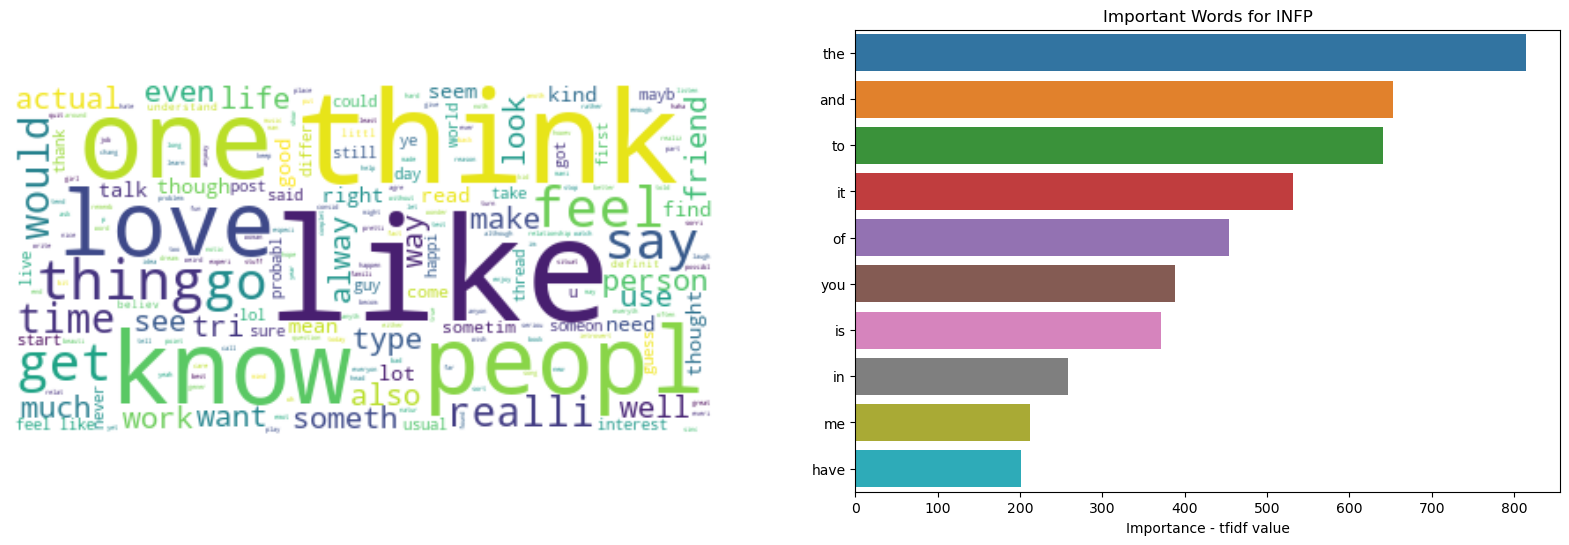

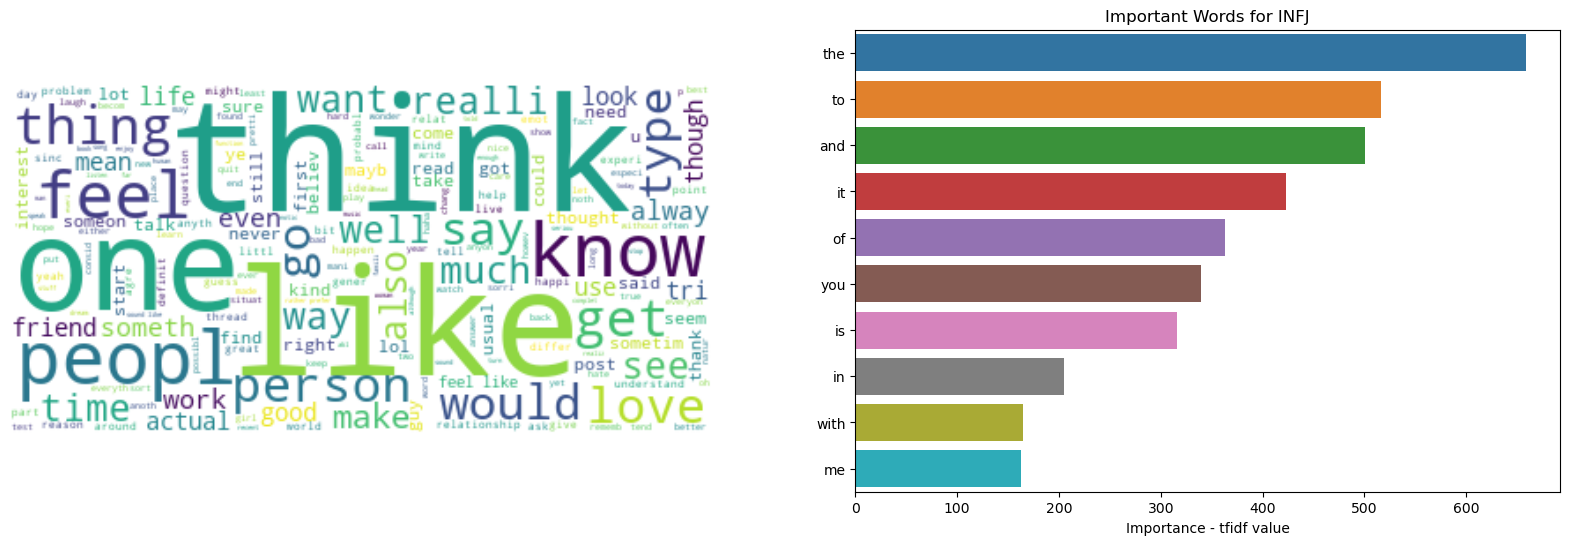

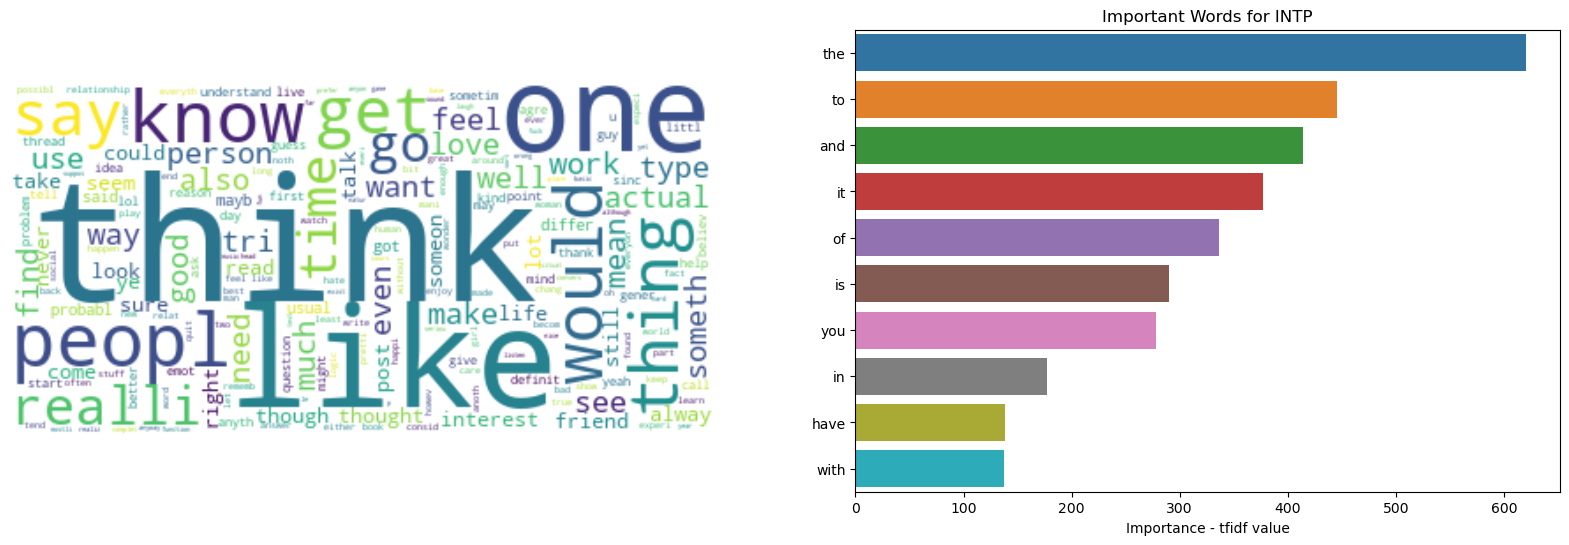

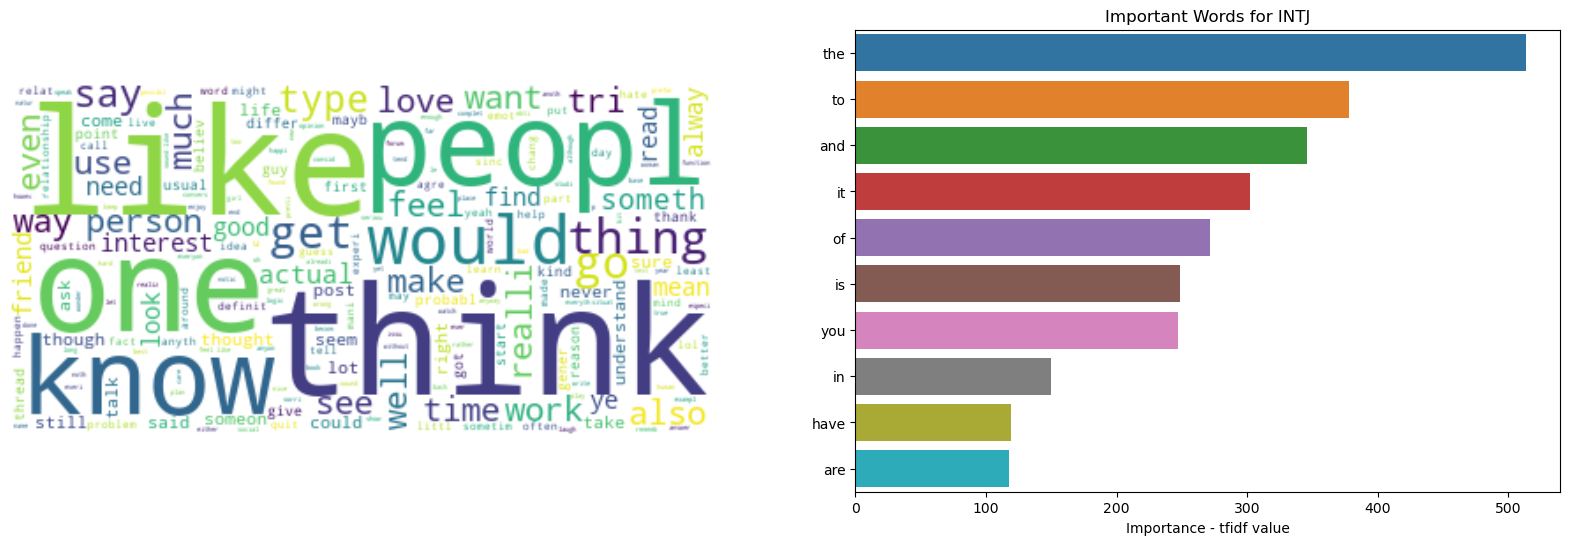

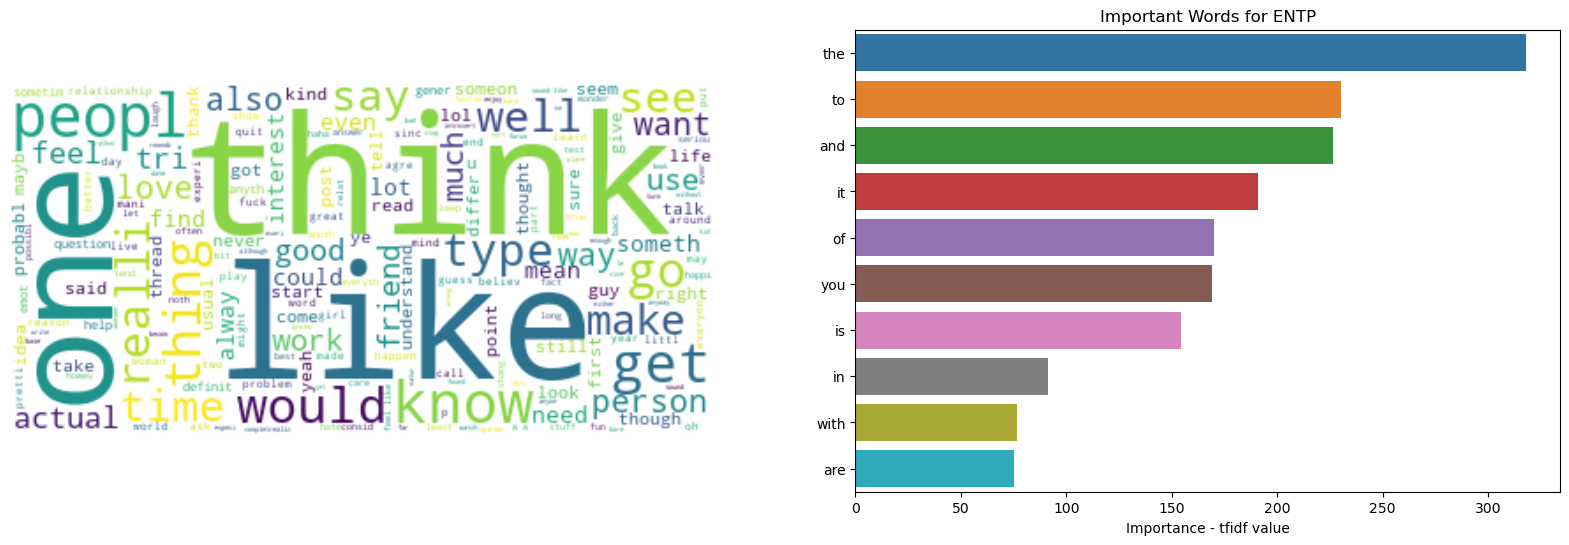

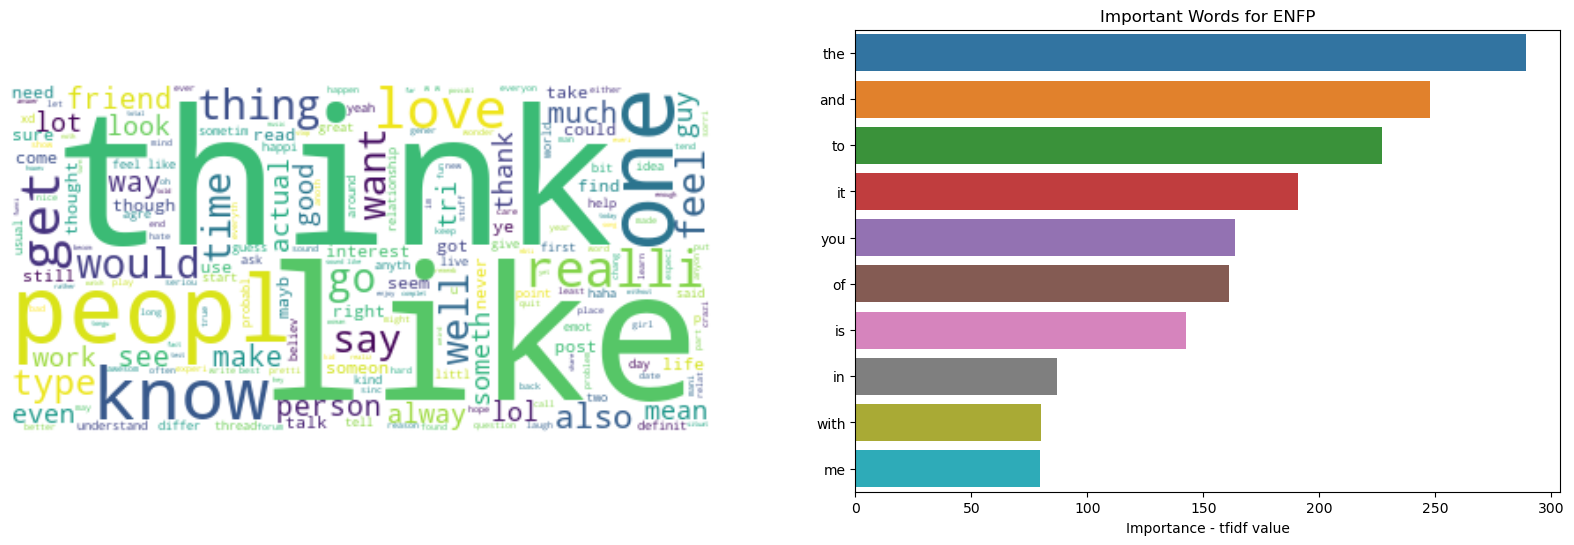

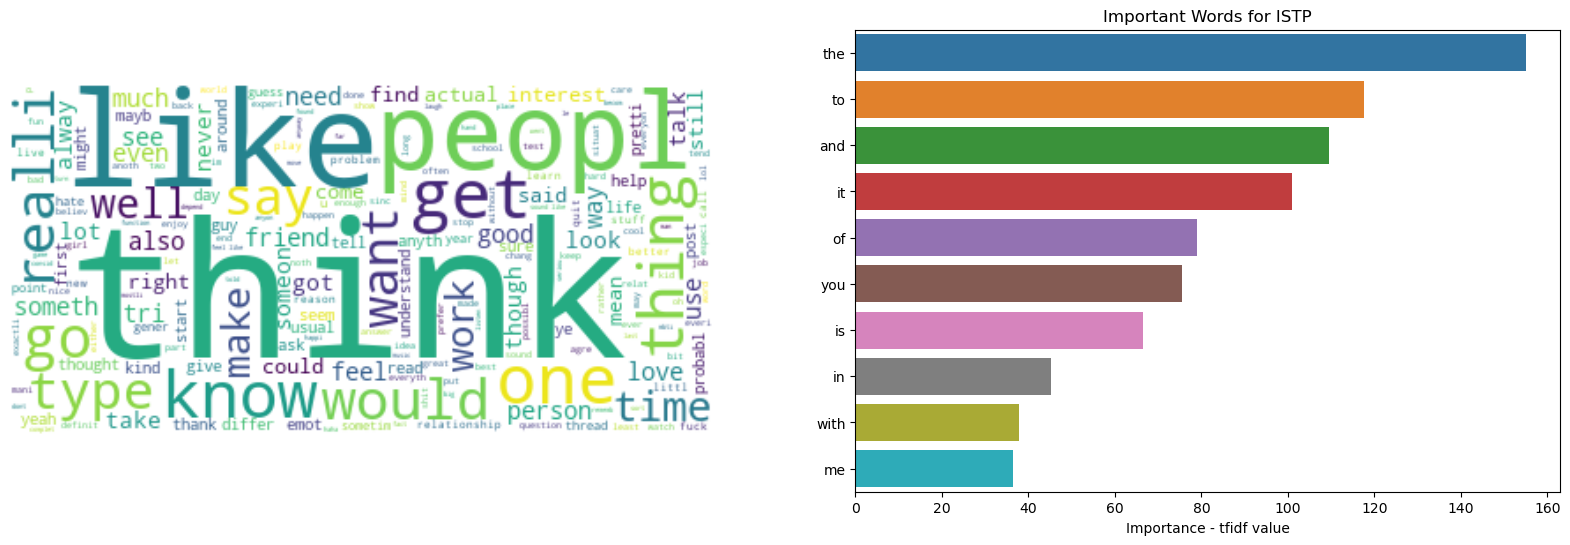

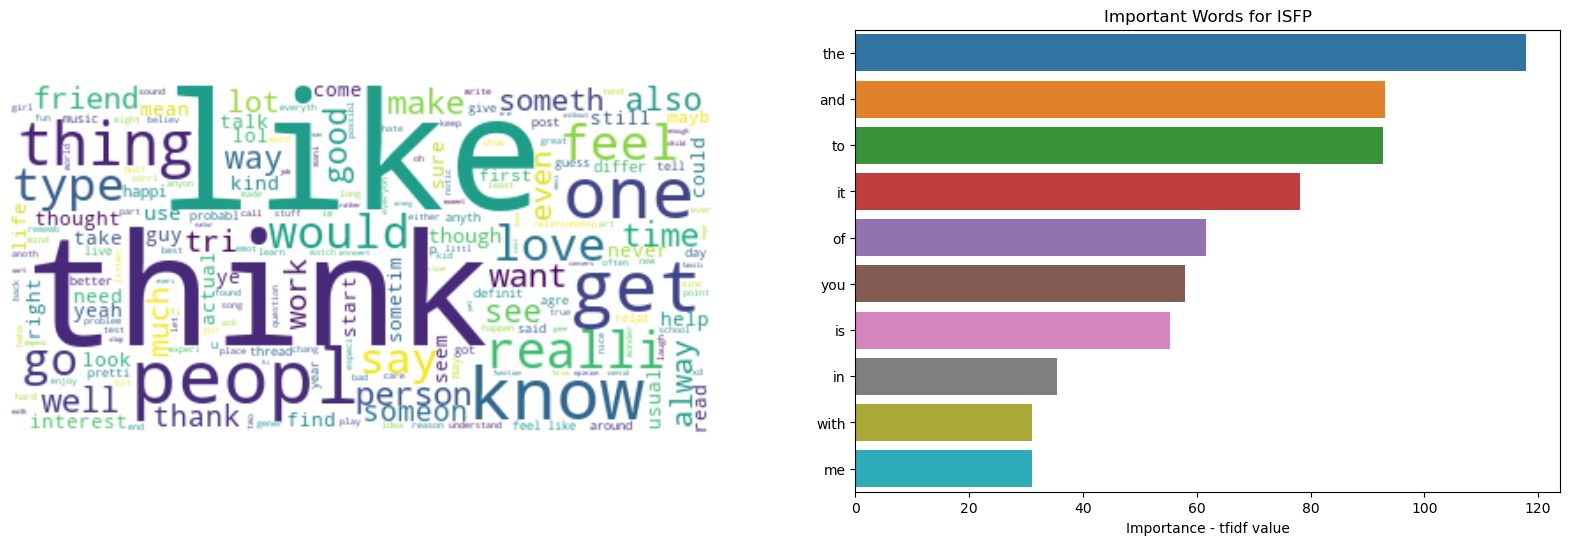

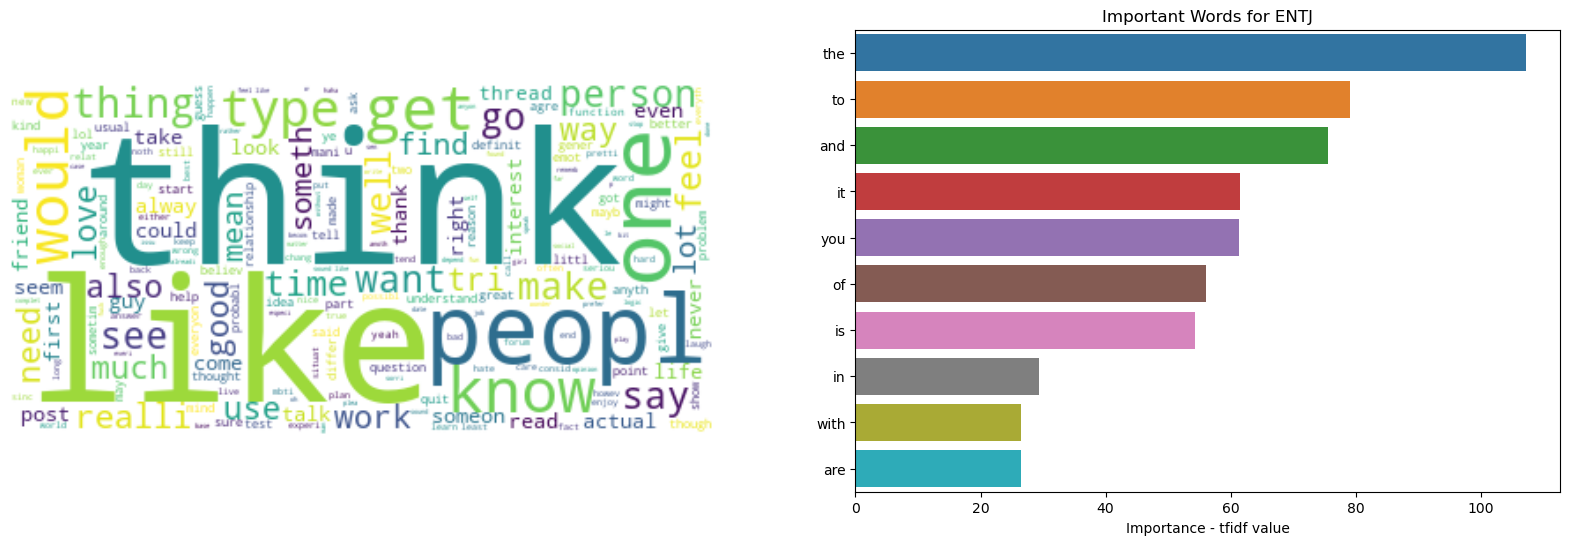

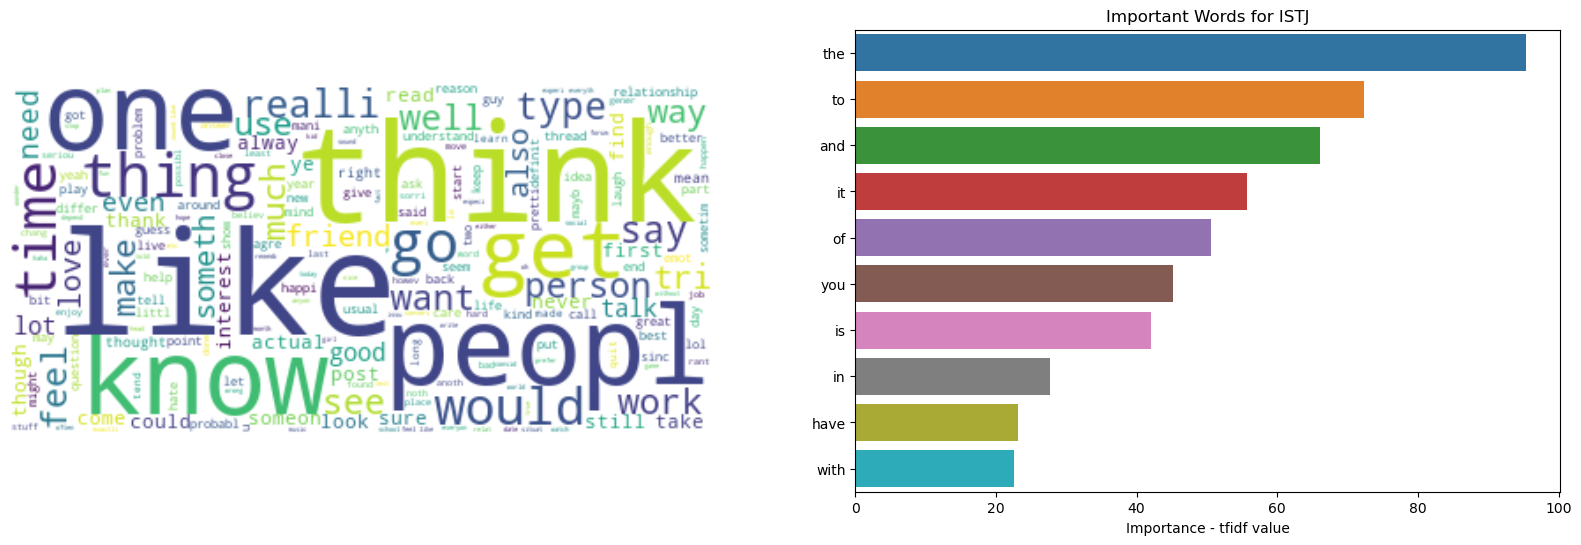

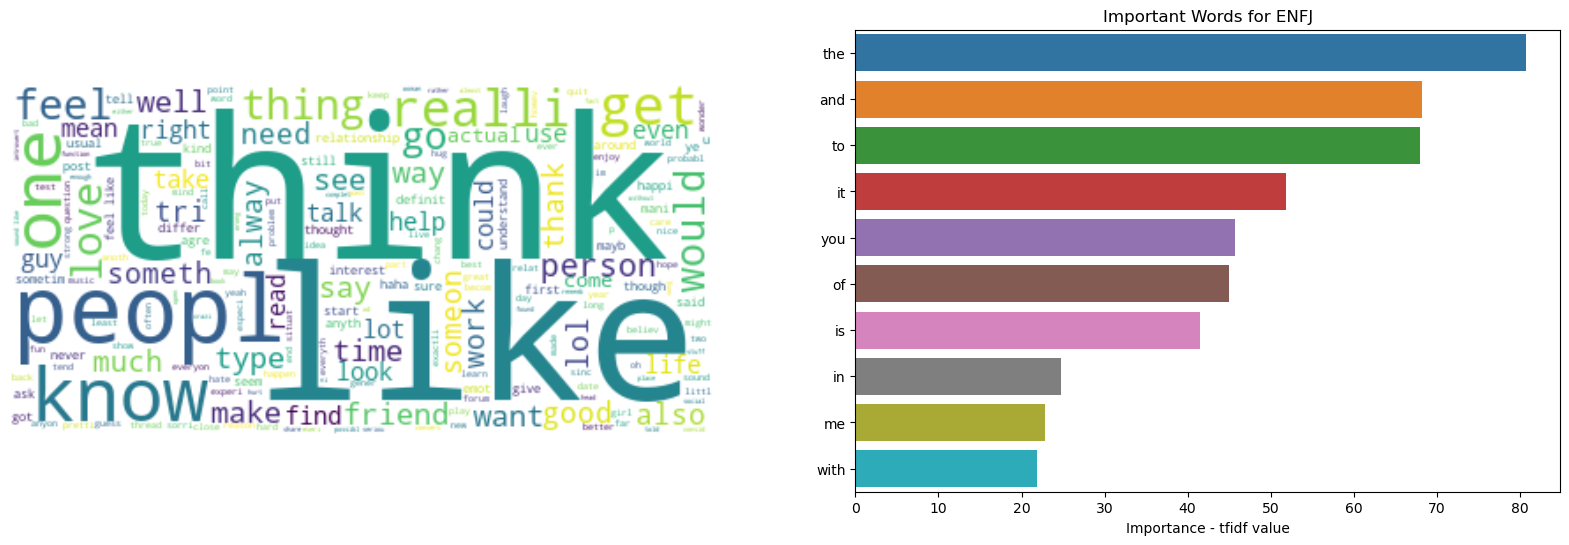

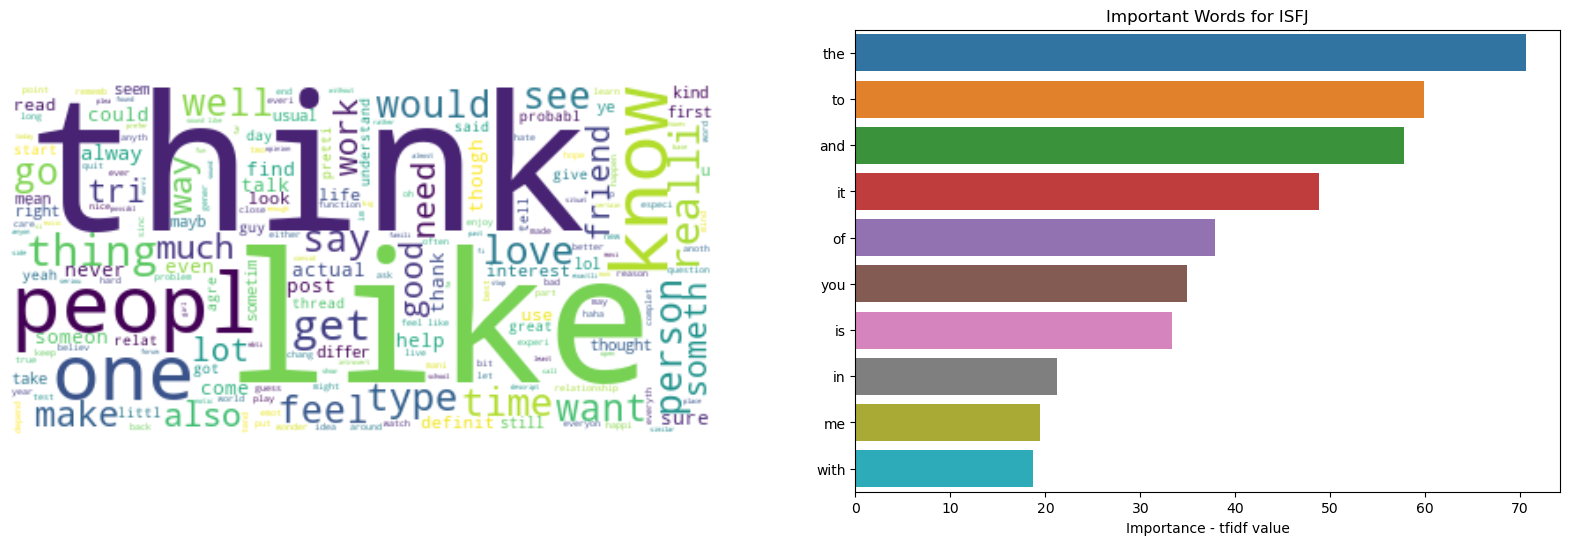

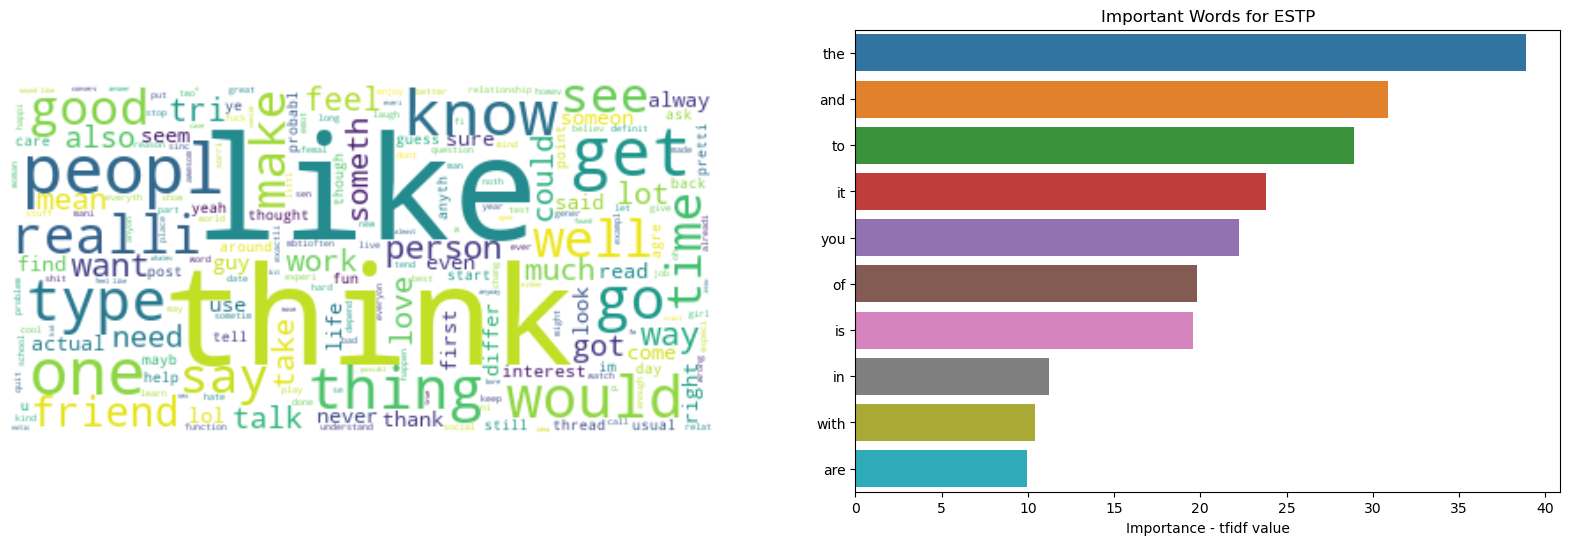

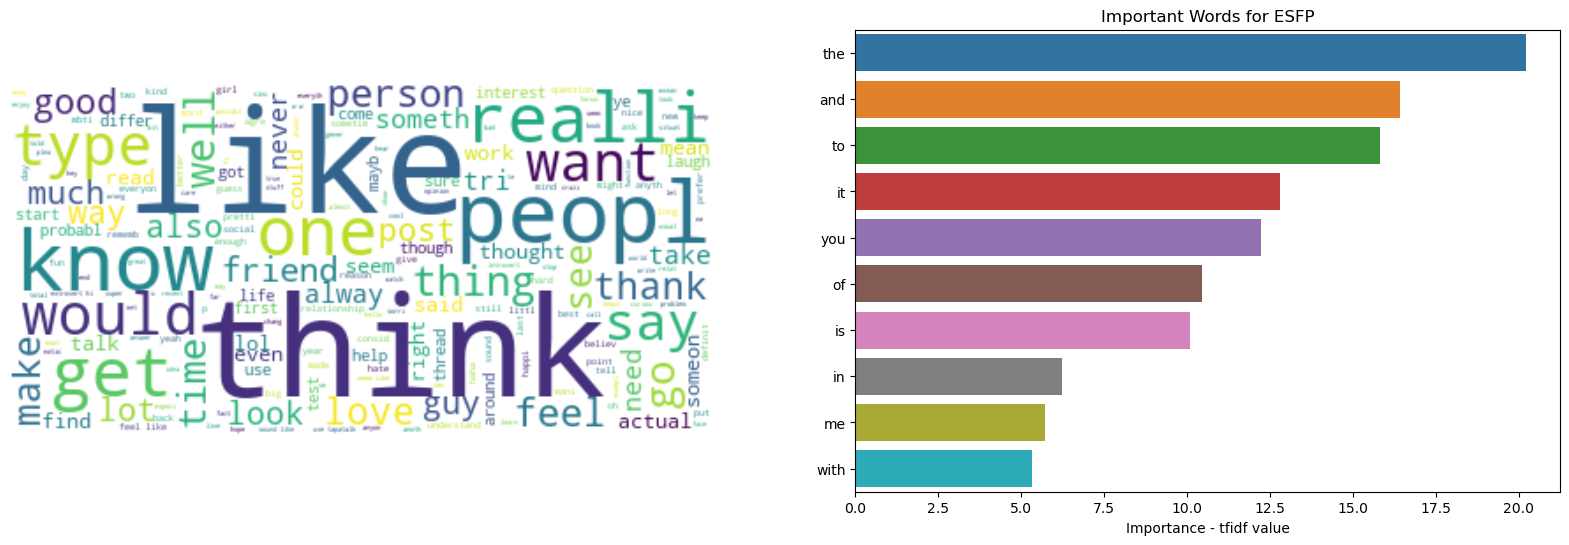

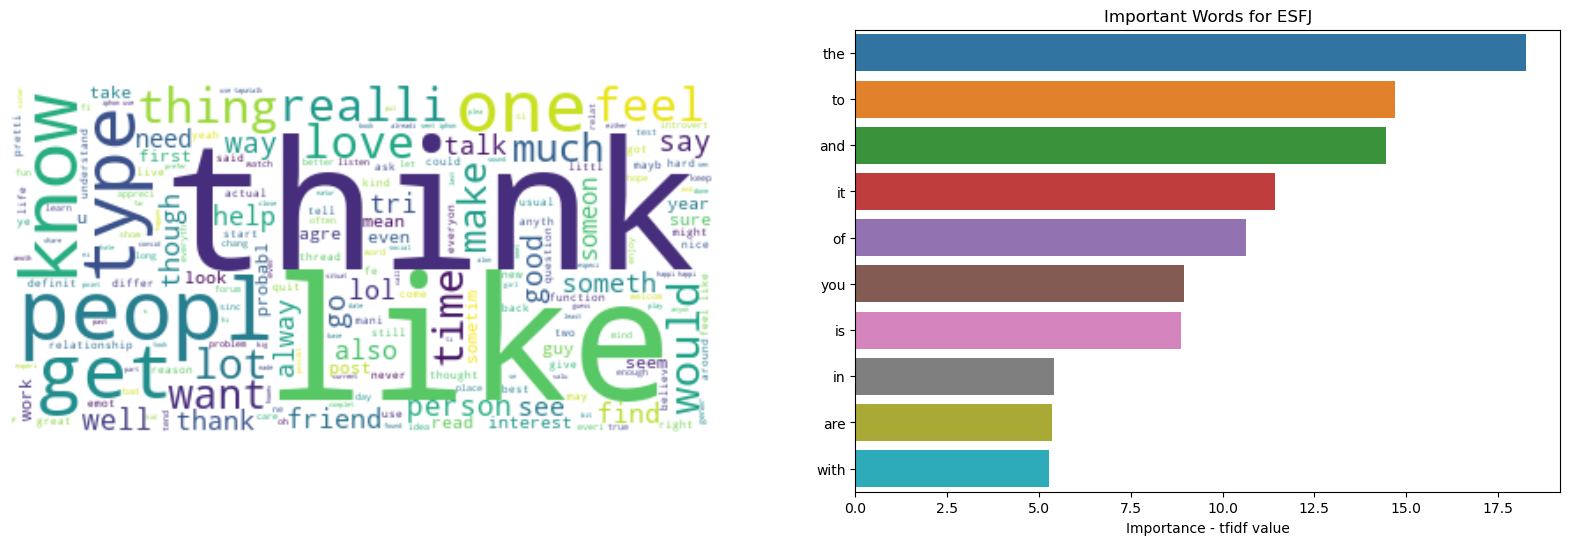

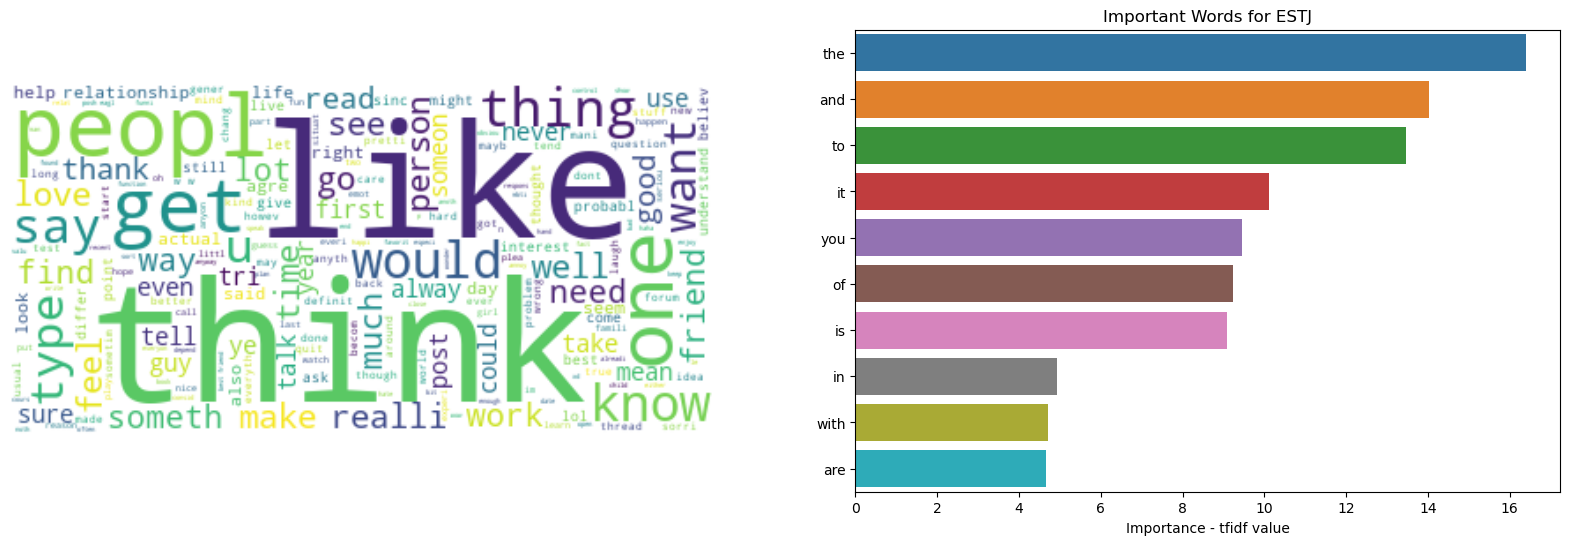

In [44]:
for i in types_count.index:
  show_type_properties(i)

### Feature Extraction and Vectorisation

In [45]:
del data_copy['type']
post_list=[]
for i,j in data_copy.posts.iteritems():
    post_list.append(j)

vector=CountVectorizer(stop_words='english',max_features=1500)
features=vector.fit_transform(post_list)
# print(finalfeatures.shape)

#tf-idf to weigh the importance of words(features) across all posts and select more relevent features
transform = TfidfTransformer()
finalfeatures =  transform.fit_transform(features).toarray()

In [46]:
finalfeatures.shape

(8675, 1500)

In [47]:
data_copy

posts   IE   NS   TF   JP
0      moment sportscent top ten play prank life cha...  1.0  1.0  0.0  1.0
1      find lack post alarm sex bore posit often exa...  0.0  1.0  1.0  0.0
2      good one cours say know bless cur absolut pos...  1.0  1.0  1.0  0.0
3      dear enjoy convers day esoter gab natur unive...  1.0  1.0  1.0  1.0
4      fire anoth silli misconcept approach logic go...  0.0  1.0  1.0  1.0
...                                                 ...  ...  ...  ...  ...
8670   ixfp alway think cat fi dom reason especi web...  1.0  0.0  0.0  0.0
8671   thread alreadi exist someplac el post heck de...  0.0  1.0  0.0  0.0
8672   mani question thing would take purpl pill pic...  1.0  1.0  1.0  0.0
8673   conflict right come want child honestli mater...  1.0  1.0  0.0  0.0
8674   long sinc personalitycaf although seem chang ...  1.0  1.0  0.0  0.0

[8675 rows x 5 columns]

In [48]:
X_data=finalfeatures
Y_data= data_copy.iloc[:,1:5]

In [49]:
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=123,stratify=Y_data)

In [50]:
#Function to predict labels for X_test of the given model
'''This function takes 4 GridSearchCV model as input.
  It fits all 4 models with thier respective training data.
  It fincs the best estimator of GridSearchCV and uses 
  it to return predicted values of 4 test sets'''
def predict(model1, model2, model3, model4):
  #IE prediction
  ypredIE=model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
  #NS prediction
  ypredNS=model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
  #TF prediction
  ypredTF=model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
  #JP prediction
  ypredJP=model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

  return ypredIE, ypredNS, ypredTF, ypredJP


#Function to print Classification Report of the given model
'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
  #Classification Report for Introversion(I) / Extroversion(E)
  print("Classification Report for Introversion(I) / Extroversion(E): \n ")
  print(classification_report(Y_test_IE, ypredIE))
  accuracyIE=accuracy_score(Y_test_IE,ypredIE)
  print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
  print("\n")

  #Classification Report for Intuition(N) / Sensing(S)
  print("Classification Report for Intuition(N) / Sensing(S): \n ")
  print(classification_report(Y_test_NS, ypredNS))
  accuracyNS=accuracy_score(Y_test_NS,ypredNS)
  print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
  print("\n")

  #Classification Report for Thinking(T) / Feeling(F)
  print("Classification Report for Thinking(T) / Feeling(F): \n ")
  print(classification_report(Y_test_TF, ypredTF))
  accuracyTF=accuracy_score(Y_test_TF,ypredTF)
  print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
  print("\n")

  #Classification Report for Judging(J) / Perceiving(P)
  print("Classification Report for Judging(J) / Perceiving(P): \n ")
  print(classification_report(Y_test_JP, ypredJP))
  accuracyJP=accuracy_score(Y_test_JP,ypredJP)
  print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
  print("\n")


#Function to print Confusion matrix for the given model
'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
  #Confusion matrix for Introversion(I) / Extroversion(E):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Blues_r');
  plt.ylabel('Y_test_IE');
  plt.xlabel('ypredIE');
  plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
  plt.show()

  #Confusion matrix for Intuition(N) / Sensing(S):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Greens_r');
  plt.ylabel('Y_test_NS');
  plt.xlabel('ypredNS');
  plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
  plt.show()

  #Confusion matrix for Thinking(T) / Feeling(P): 
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Reds_r');
  plt.ylabel('Y_test_TF');
  plt.xlabel('ypredTF');
  plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size = 17);
  plt.show()

  #Confusion matrix for Judging(J) / Perceiving(P):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Purples_r');
  plt.ylabel('Y_test_JP');
  plt.xlabel('ypredJP');
  plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
  plt.show()


#Function to print roc_auc_curve for the given model
'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''
def print_roc_auc_curve(probIE, probNS, probTF, probJP):
  
  fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
  fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
  fp_TF, tp_TF, val = roc_curve(Y_test_TF, probTF[:,1])
  fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

  plt.figure()
  plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
  plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
  plt.plot(fp_TF, tp_TF, linestyle='--', color='pink', label='Thinking(T) / Feeling(F)')
  plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()


# Naive Bayes

In [51]:
#Naive Bayes Model
naivegb=GaussianNB()
#Apply stratified cross validation
grid1=GridSearchCV(naivegb,{},cv=5)
grid2=GridSearchCV(naivegb,{},cv=5)
grid3=GridSearchCV(naivegb,{},cv=5)
grid4=GridSearchCV(naivegb,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.36      0.61      0.45       401
         1.0       0.85      0.68      0.76      1334

    accuracy                           0.66      1735
   macro avg       0.61      0.64      0.60      1735
weighted avg       0.74      0.66      0.69      1735

Accuracy for Introversion(I) / Extroversion(E):  0.6622478386167147 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.25      0.50      0.33       240
         1.0       0.90      0.76      0.82      1495

    accuracy                           0.72      1735
   macro avg       0.58      0.63      0.58      1735
weighted avg       0.81      0.72      0.75      1735

Accuracy for Intuition(N) / Sensing(S):  0.7198847262247838 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 640x480 with 0 Axes>

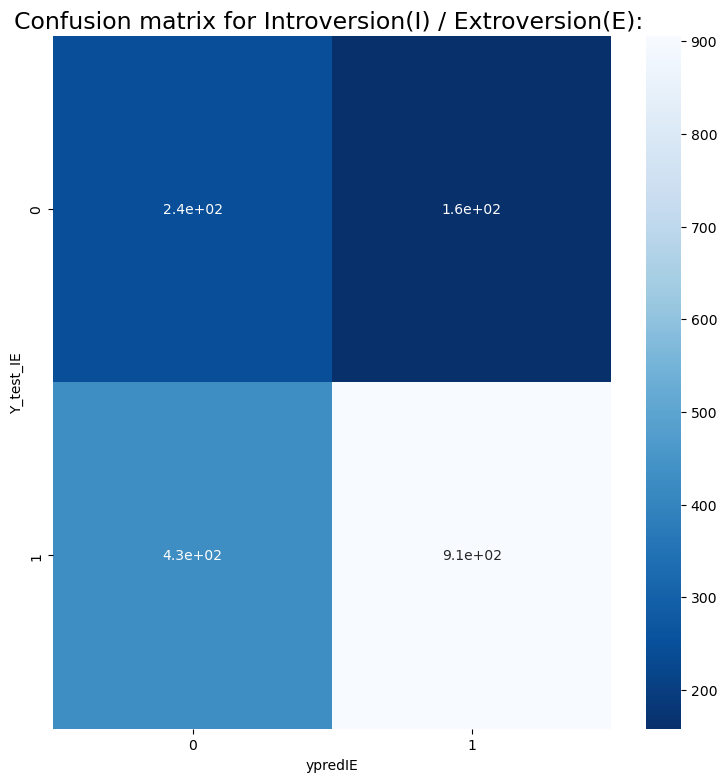

<Figure size 640x480 with 0 Axes>

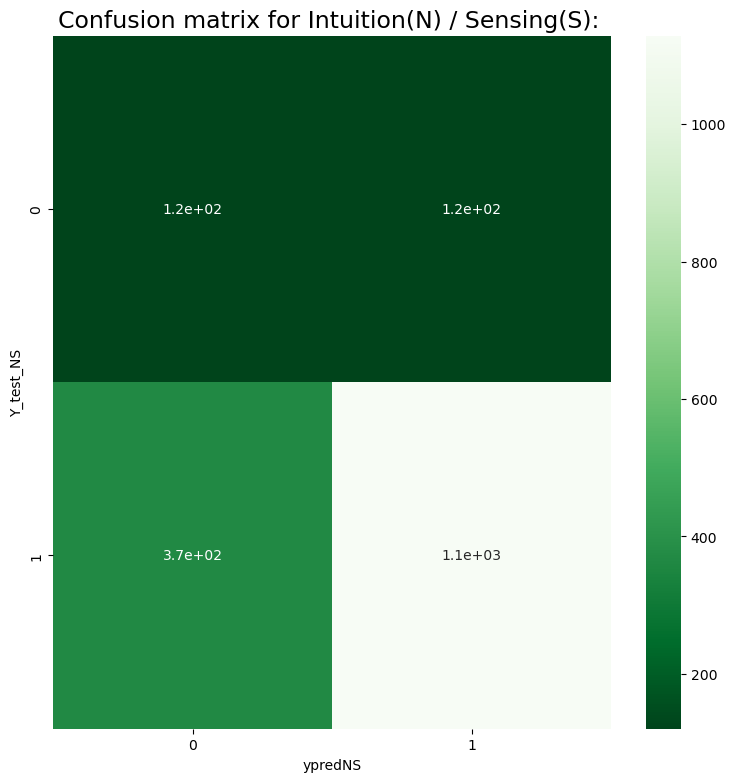

<Figure size 640x480 with 0 Axes>

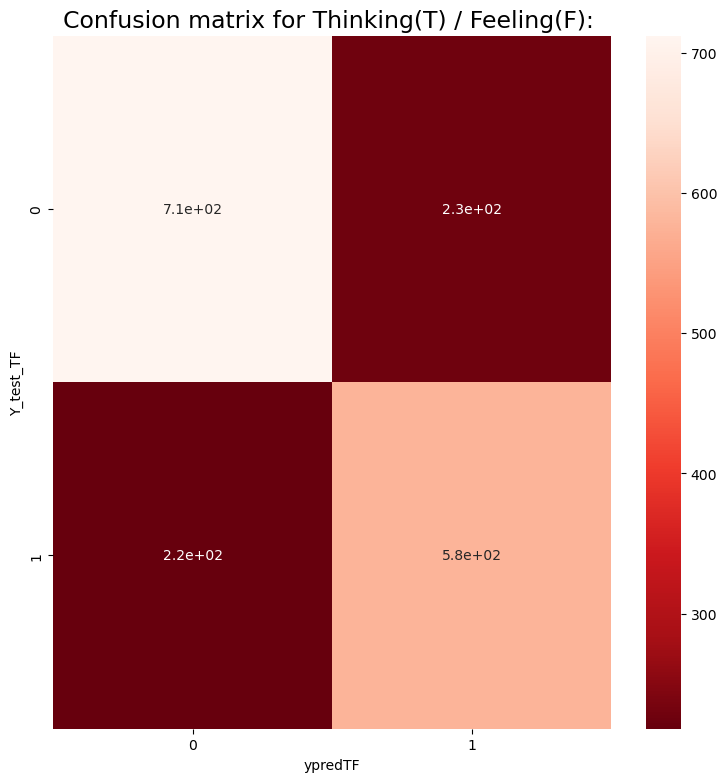

<Figure size 640x480 with 0 Axes>

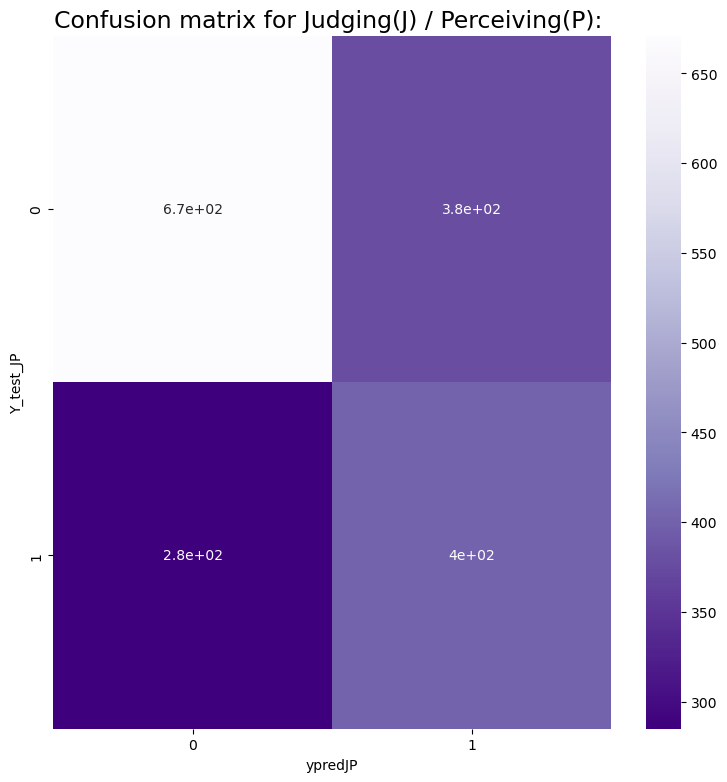

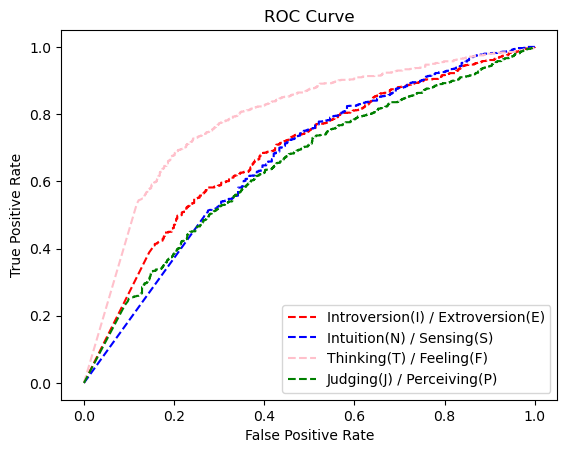

In [52]:
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)
#plot ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))


## Logistic Regression


In [53]:
#Logistic Regression model
log =LogisticRegression(max_iter=500)
#Apply stratified cross validation
grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.67      0.15      0.24       401
         1.0       0.79      0.98      0.88      1334

    accuracy                           0.79      1735
   macro avg       0.73      0.56      0.56      1735
weighted avg       0.76      0.79      0.73      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7861671469740634 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.60      0.01      0.02       240
         1.0       0.86      1.00      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.73      0.51      0.48      1735
weighted avg       0.83      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.8622478386167147 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 640x480 with 0 Axes>

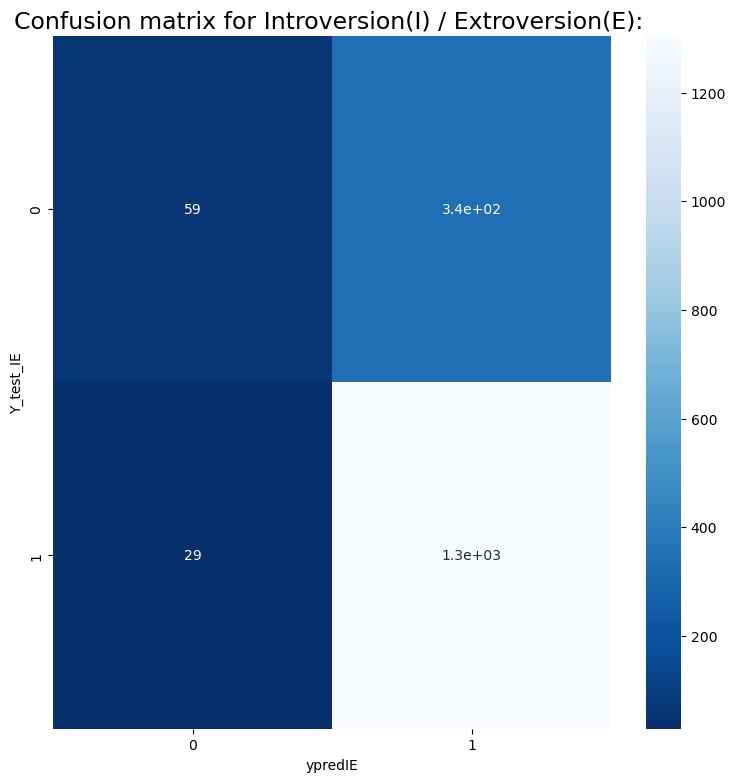

<Figure size 640x480 with 0 Axes>

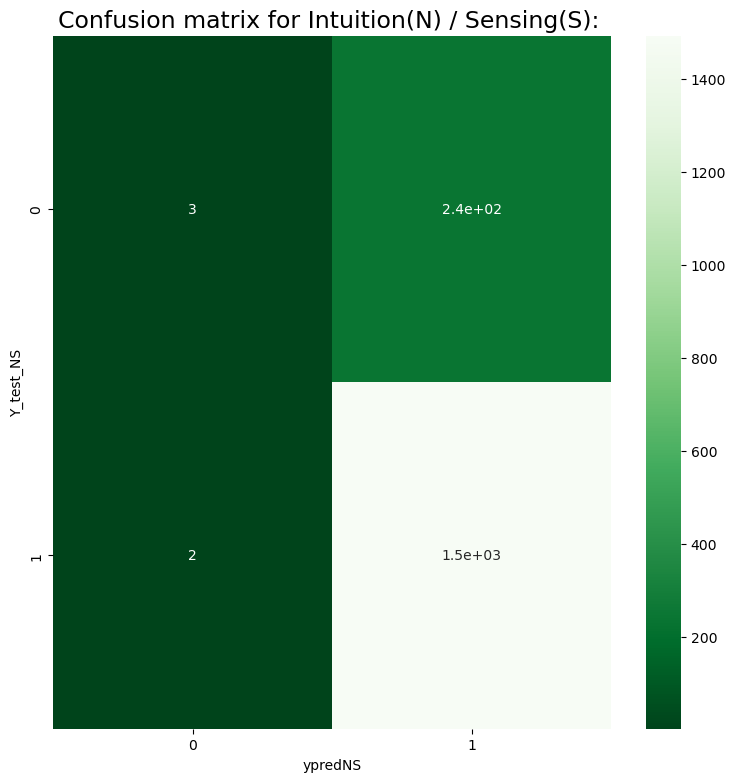

<Figure size 640x480 with 0 Axes>

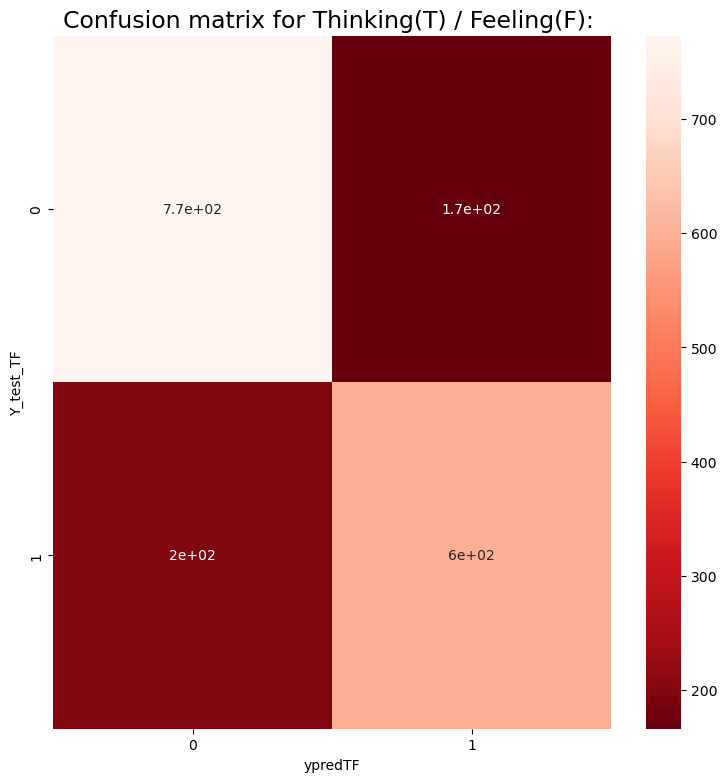

<Figure size 640x480 with 0 Axes>

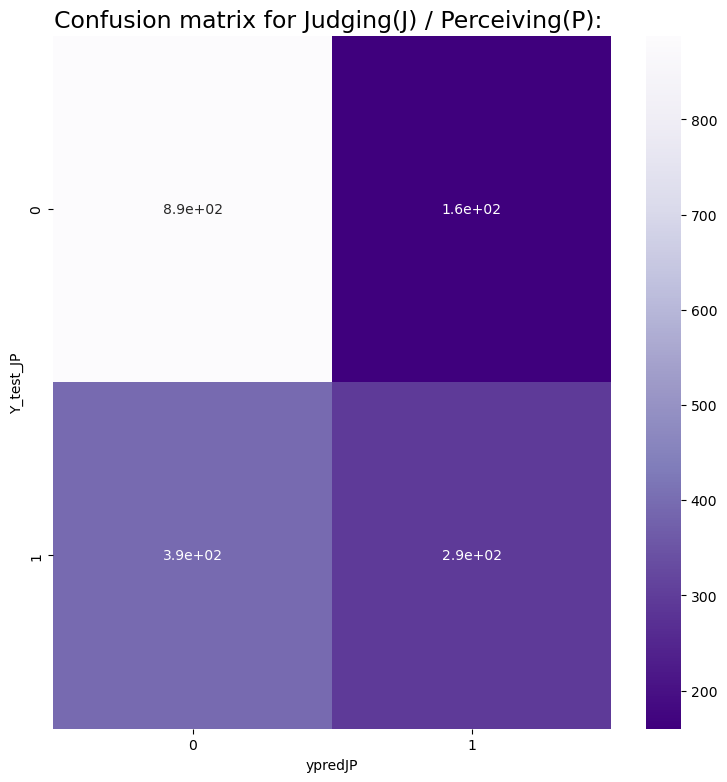

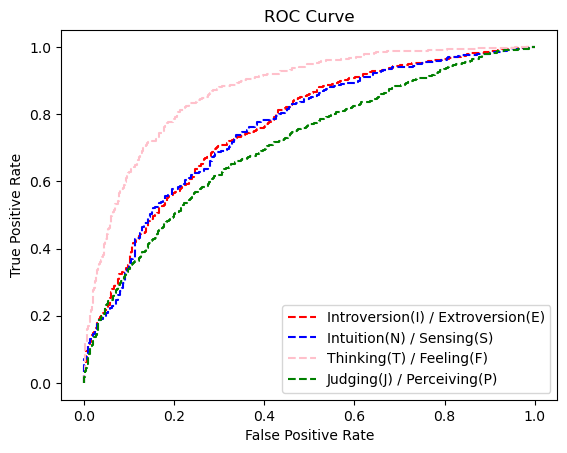

In [54]:
#Plot confusion matix for all four dimensions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

#Plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

## Random Forest

<Figure size 640x480 with 0 Axes>

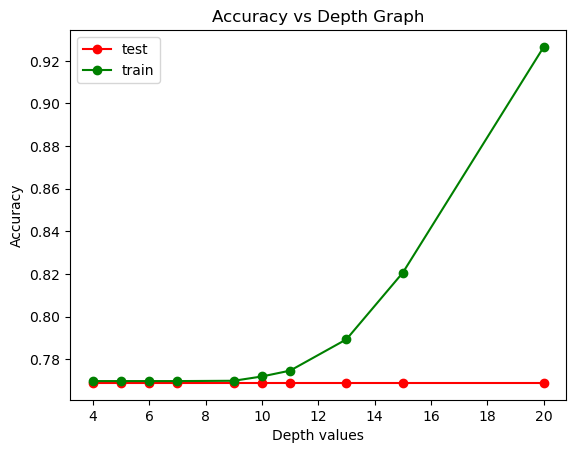

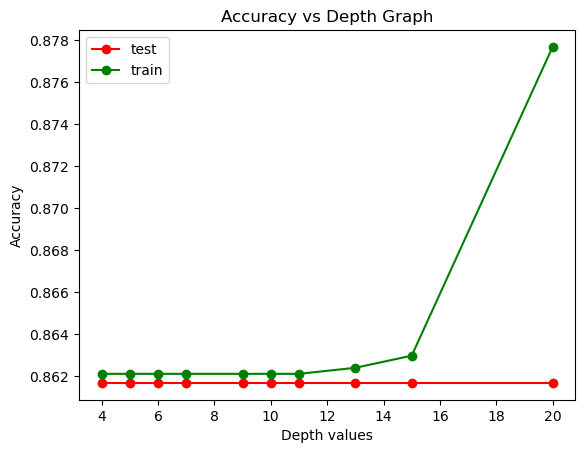

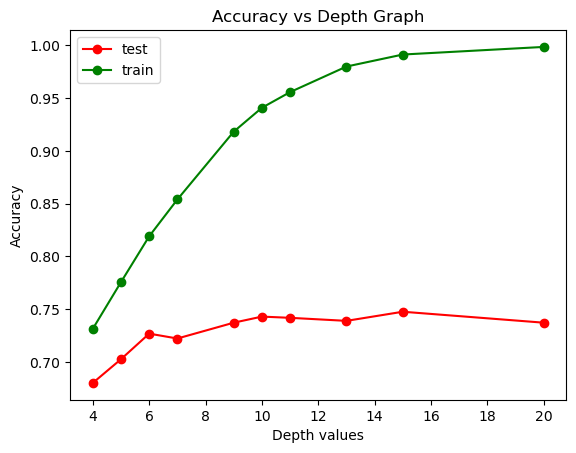

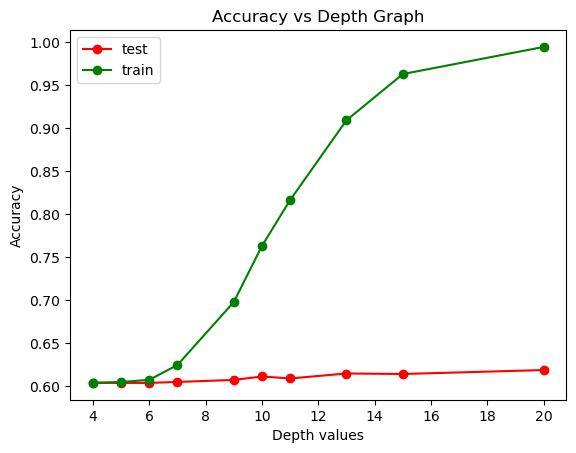

<Figure size 640x480 with 0 Axes>

In [55]:
def depth_accuracy(X_train, Y_train, X_test, Y_test):
  depths = [4, 5, 6, 7, 9, 10, 11, 13, 15, 20]
  accuracies_test = list() 
  accuracies_train = list() 

  for x in depths:
   model_dt = RandomForestClassifier(max_depth=x, random_state=123)
   model_dt.fit(X_train,Y_train)
   predictions = model_dt.predict(X_test)
   acc=accuracy_score(Y_test, predictions)
   accuracies_test.append(acc)
   predictions = model_dt.predict(X_train)
   acc=accuracy_score(Y_train, predictions)
   accuracies_train.append(acc)

  #plotting
  plt.plot(depths, accuracies_test, marker='o', color='red', label='test')
  plt.plot(depths, accuracies_train, marker='o', color='green', label='train')
  plt.xlabel('Depth values')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title("Accuracy vs Depth Graph")

'''Plot depth vs accuracy graphs to find the best-tuned value of max_depth'''
depth_accuracy(X_train_IE, Y_train_IE, X_test_IE, Y_test_IE)
plt.figure()
depth_accuracy(X_train_NS, Y_train_NS, X_test_NS, Y_test_NS)
plt.figure()
depth_accuracy(X_train_TF, Y_train_TF, X_test_TF, Y_test_TF)
plt.figure()
depth_accuracy(X_train_JP, Y_train_JP, X_test_JP, Y_test_JP)
plt.figure()


In [56]:
'''Predictions using Random Forest Classifier'''
#IE prediction
Random_F1 = RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=123)
grid1=GridSearchCV(Random_F1,{},cv=5)
ypredIE= grid1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)

#NS prediction
Random_F2 = RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=123)
grid2=GridSearchCV(Random_F2,{},cv=5)
ypredNS= grid2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)

#TF prediction
Random_F3 = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=123)
grid3=GridSearchCV(Random_F3,{},cv=5)
ypredTF= grid3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)

#JP prediction
Random_F4 = RandomForestClassifier(max_depth=6, min_samples_split=10, random_state=123)
grid4=GridSearchCV(Random_F4,{},cv=5)
ypredJP= grid4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       401
         1.0       0.77      1.00      0.87      1334

    accuracy                           0.77      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.59      0.77      0.67      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7688760806916427 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       240
         1.0       0.86      1.00      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.861671469740634 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  f

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

<Figure size 640x480 with 0 Axes>

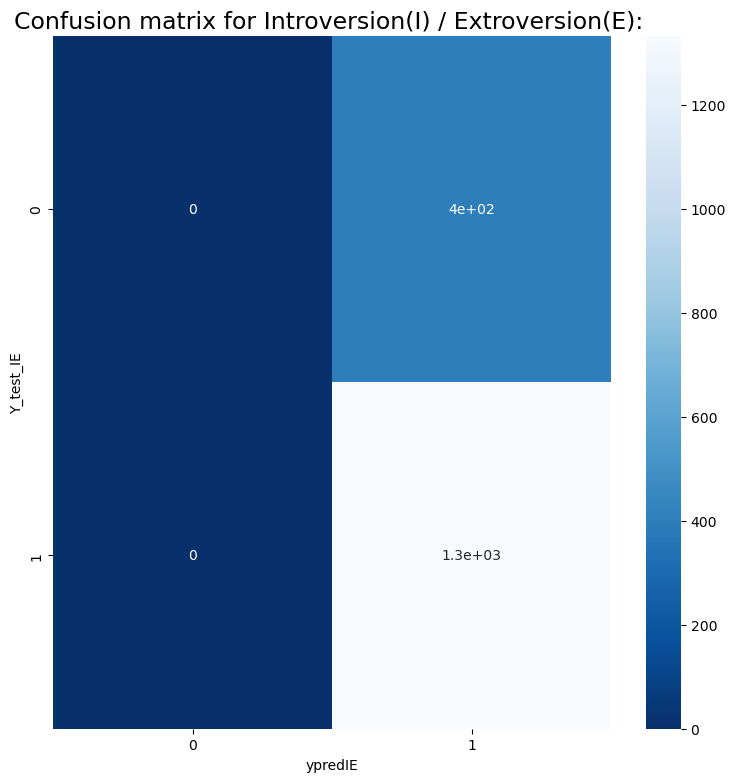

<Figure size 640x480 with 0 Axes>

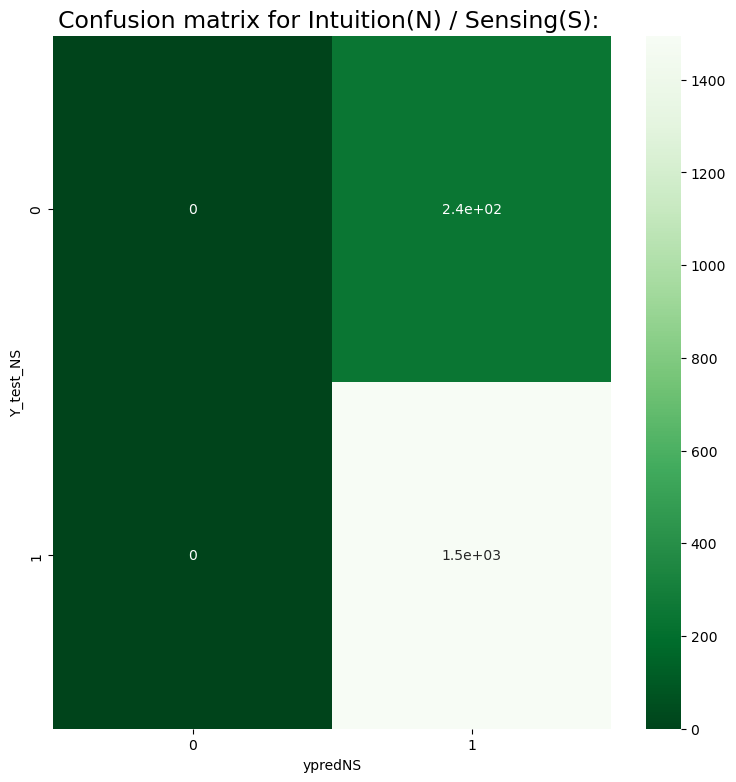

<Figure size 640x480 with 0 Axes>

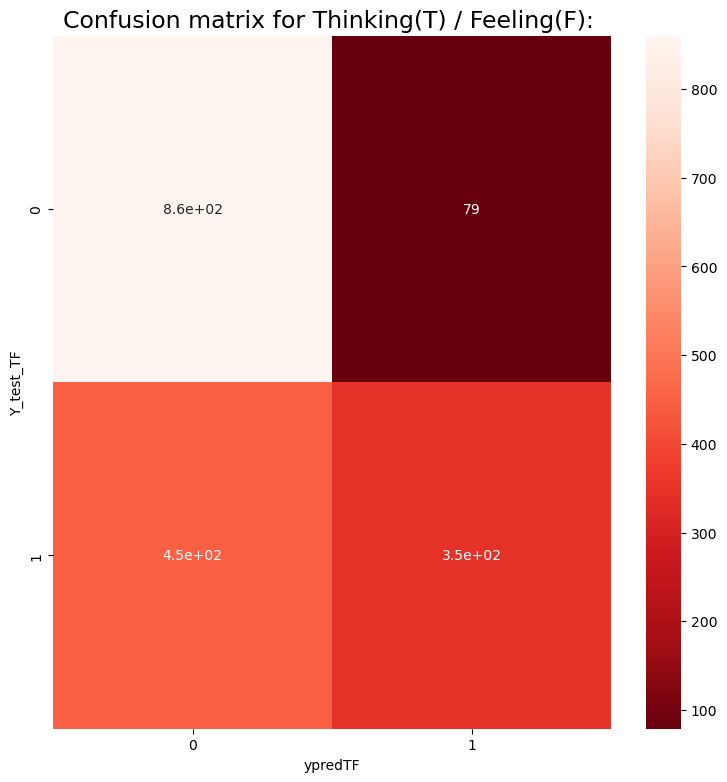

<Figure size 640x480 with 0 Axes>

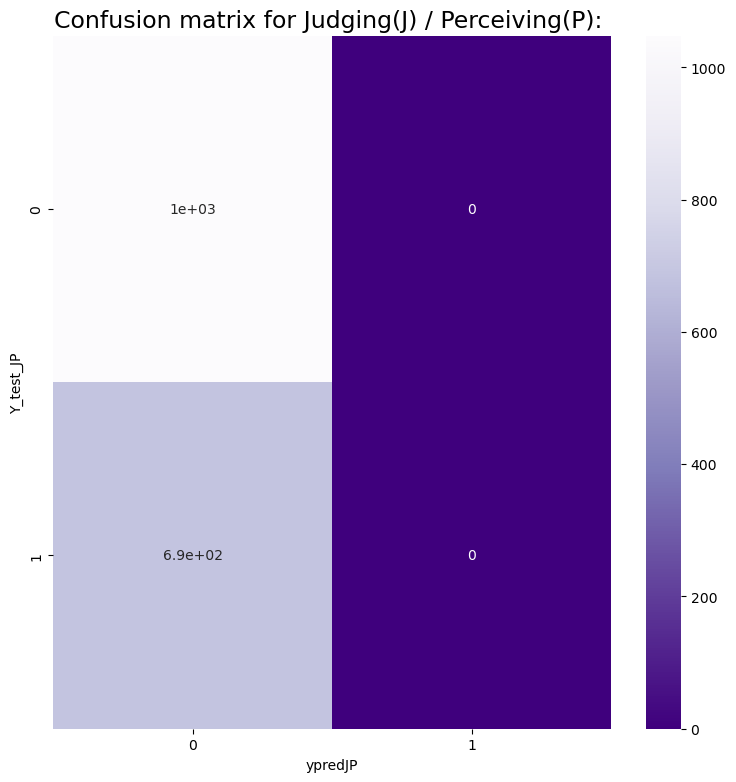

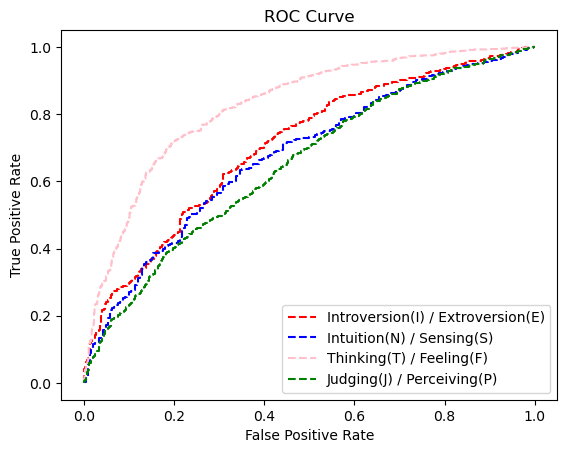

In [57]:
#Plot confusion matrix for all 4 dimnesions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

#Plot ROC curve for all 4 dimnesions
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP))

## K-Nearest Neighbour

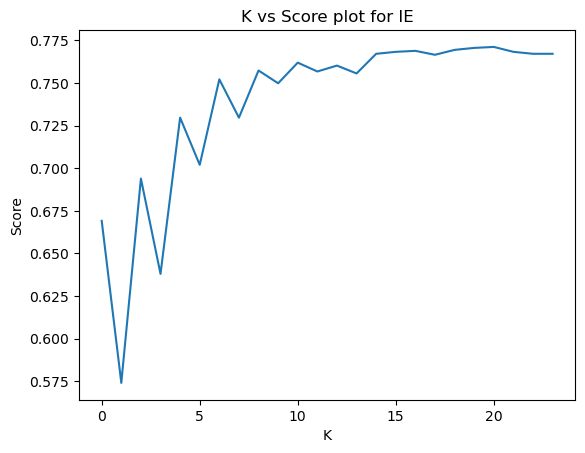

Maximum Accuracy of 0.7711815561959654 at k=21


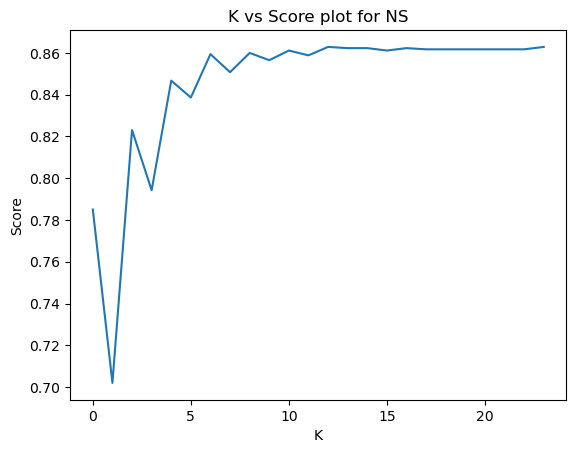

Maximum Accuracy of 0.8628242074927954 at k=13


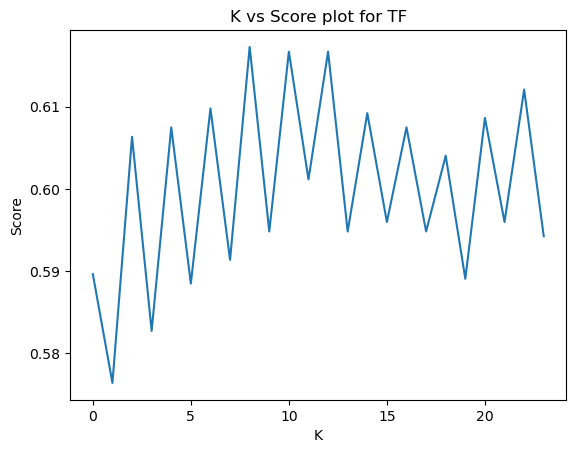

Maximum Accuracy of 0.6172910662824207 at k=9


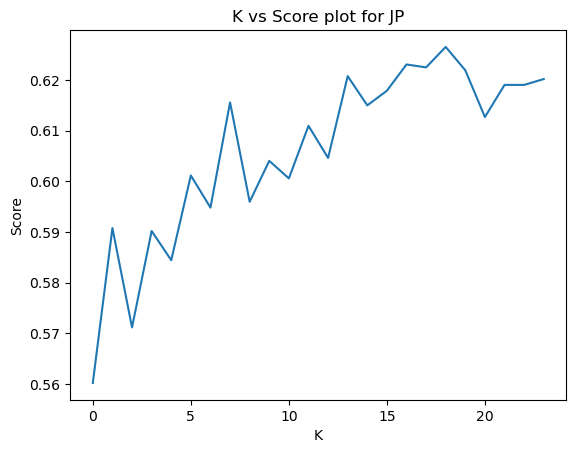

Maximum Accuracy of 0.6172910662824207 at k=9


In [58]:

def plot_graph(val,xlab,ylab,title):
  plt.figure()
  plt.plot(val)
  plt.ylabel(ylab)
  plt.xlabel(xlab);
  plt.title(title)
  plt.show()

#IE prediction
k1_score=[]
for i in range(1,25):
  k1=KNeighborsClassifier(n_neighbors=i)
  k1.fit(X_train_IE,Y_train_IE)
  k1_score.append(k1.score(X_test_IE,Y_test_IE))

df1=pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

#NS prediction
k2_score=[]
for i in range(1,25):
  k2=KNeighborsClassifier(n_neighbors=i)
  k2.fit(X_train_NS,Y_train_NS)
  k2_score.append(k2.score(X_test_NS,Y_test_NS))

df2=pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

#TF prediction
k3_score=[]
for i in range(1,25):
  k3=KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_train_TF,Y_train_TF)
  k3_score.append(k3.score(X_test_TF,Y_test_TF))

df3=pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

#JP prediction
k4_score=[]
for i in range(1,25):
  k4=KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_train_JP,Y_train_JP)
  k4_score.append(k4.score(X_test_JP,Y_test_JP))

df4=pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')

In [59]:
kbest=KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
ypredIE=kbest.fit(X_train_IE,Y_train_IE).predict(X_test_IE)
probIE= kbest.predict_proba(X_test_IE)

kbest=KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
ypredNS=kbest.fit(X_train_NS,Y_train_NS).predict(X_test_NS)
probNS= kbest.predict_proba(X_test_NS)

kbest=KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
ypredTF=kbest.fit(X_train_TF,Y_train_TF).predict(X_test_TF)
probTF= kbest.predict_proba(X_test_TF)

kbest=KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
ypredJP=kbest.fit(X_train_JP,Y_train_JP).predict(X_test_JP)
probJP= kbest.predict_proba(X_test_JP)

#Print KNN Results
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.59      0.03      0.06       401
         1.0       0.77      0.99      0.87      1334

    accuracy                           0.77      1735
   macro avg       0.68      0.51      0.47      1735
weighted avg       0.73      0.77      0.68      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7711815561959654 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.75      0.01      0.02       240
         1.0       0.86      1.00      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.81      0.51      0.48      1735
weighted avg       0.85      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.8628242074927954 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 640x480 with 0 Axes>

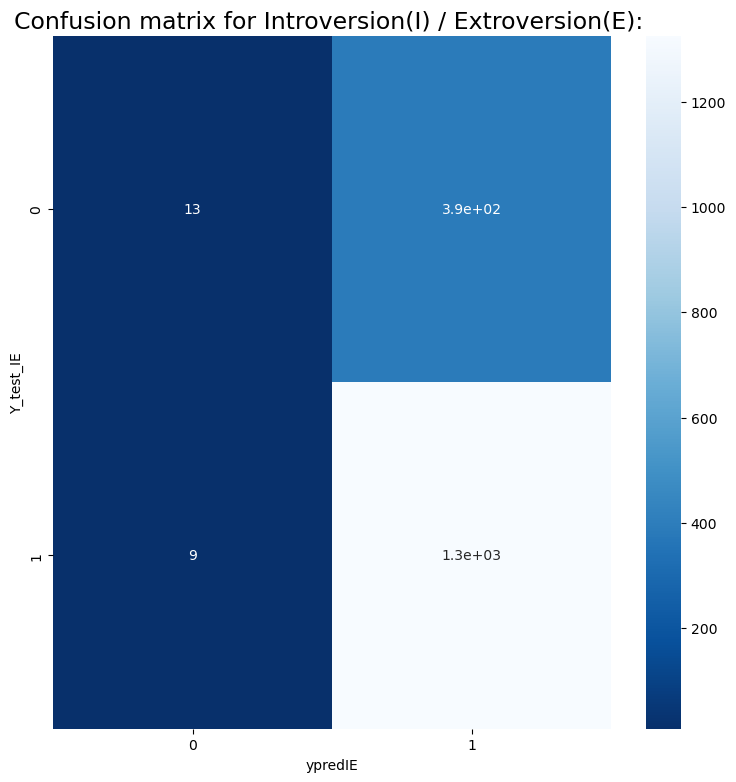

<Figure size 640x480 with 0 Axes>

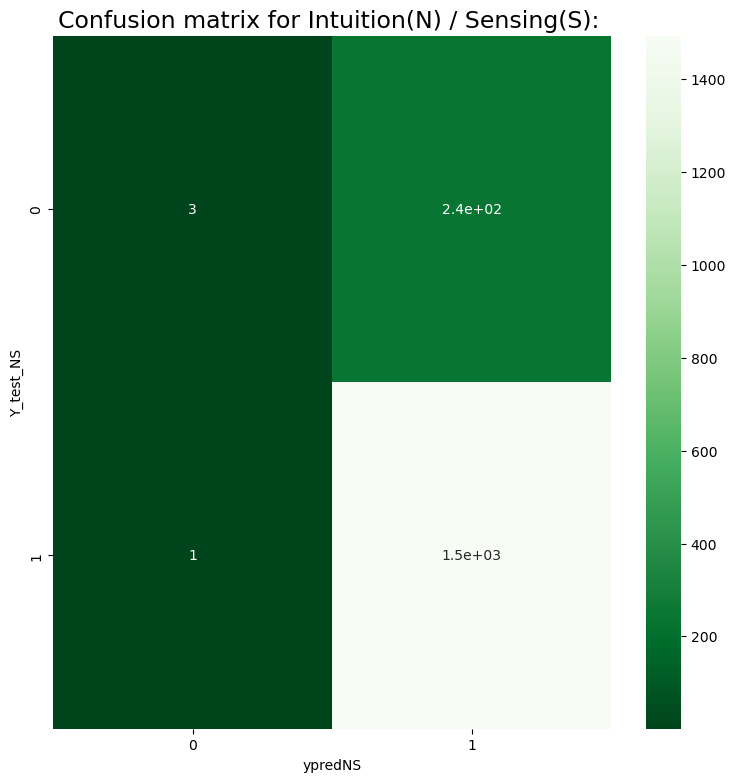

<Figure size 640x480 with 0 Axes>

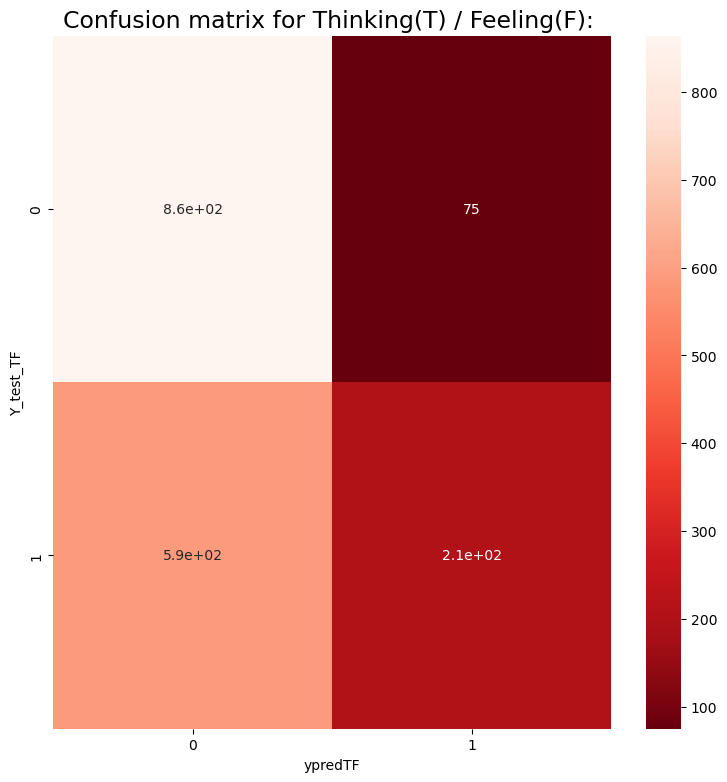

<Figure size 640x480 with 0 Axes>

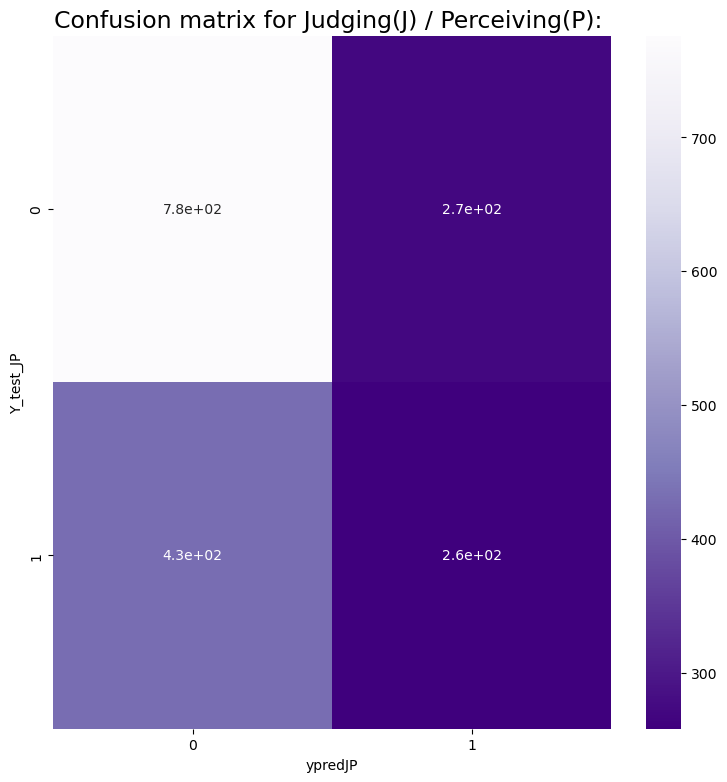

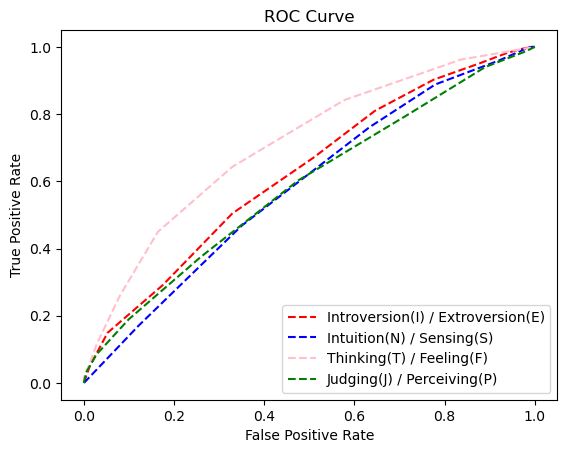

In [60]:
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)


#Plot ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP)

## Stochastic Gradient Descent

In [61]:
#SGDClassifier Model
sgd_model= SGDClassifier(loss='log') 
#Apply cross validation
grid1=GridSearchCV(sgd_model,{},cv=5)
grid2=GridSearchCV(sgd_model,{},cv=5)
grid3=GridSearchCV(sgd_model,{},cv=5)
grid4=GridSearchCV(sgd_model,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.63      0.31      0.42       401
         1.0       0.82      0.95      0.88      1334

    accuracy                           0.80      1735
   macro avg       0.73      0.63      0.65      1735
weighted avg       0.78      0.80      0.77      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7988472622478386 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.52      0.06      0.10       240
         1.0       0.87      0.99      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.69      0.52      0.52      1735
weighted avg       0.82      0.86      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8622478386167147 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 640x480 with 0 Axes>

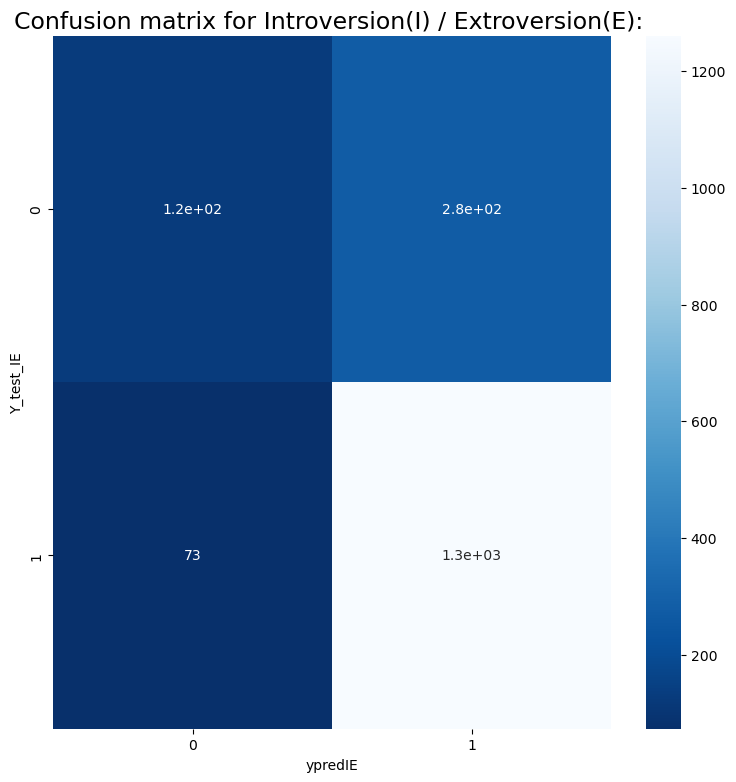

<Figure size 640x480 with 0 Axes>

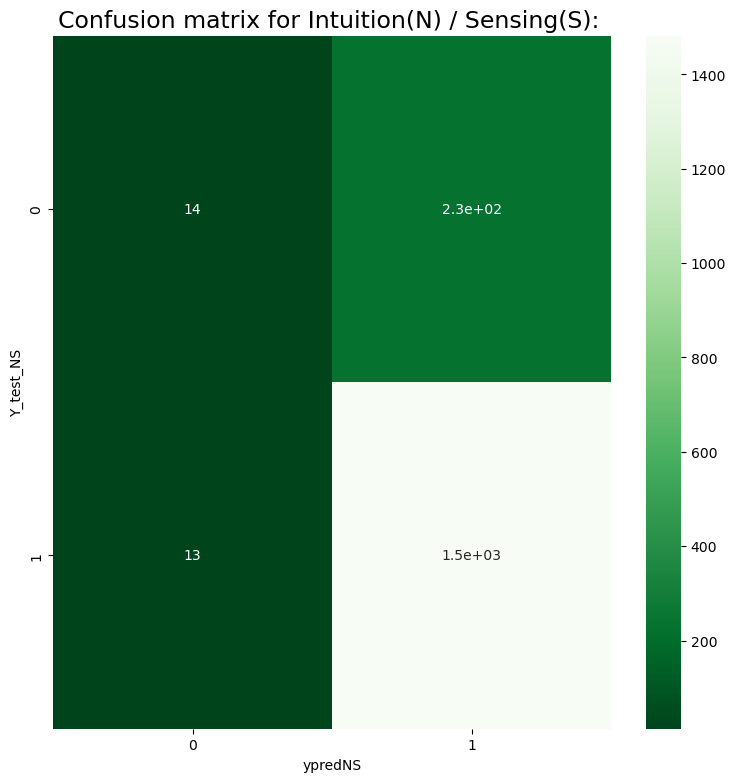

<Figure size 640x480 with 0 Axes>

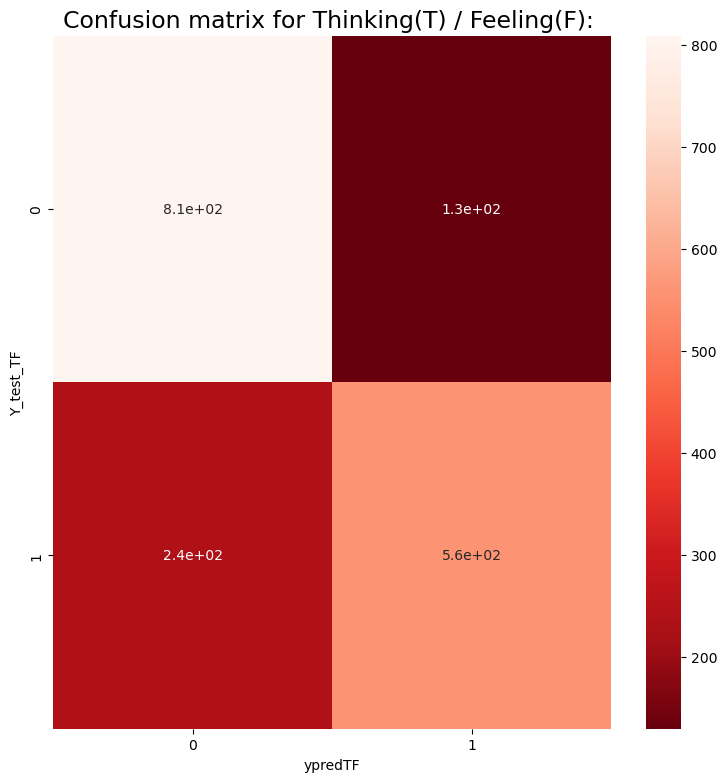

<Figure size 640x480 with 0 Axes>

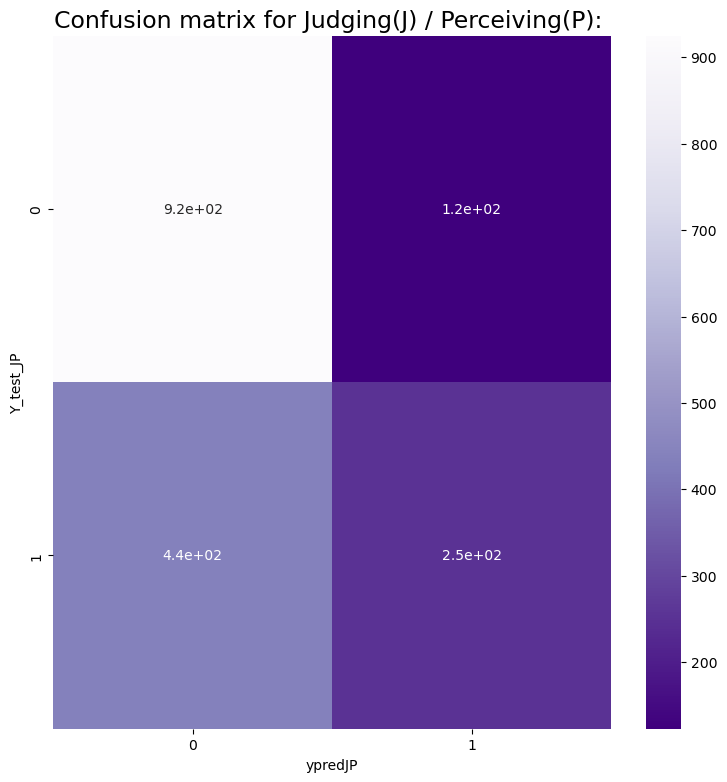

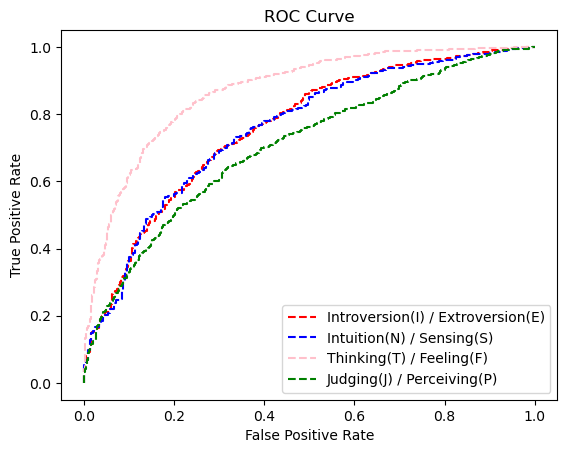

In [62]:
#Plot Confusion Matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

#plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP))

## Support Vector Machines

In [63]:
#IE prediction
svm1=SVC(random_state=123, probability=True)
svm1.fit(X_train_IE,Y_train_IE)
ypredIE=svm1.predict(X_test_IE)

#NS prediction
svm2=SVC(random_state=123, probability=True)
svm2.fit(X_train_NS,Y_train_NS)
ypredNS=svm2.predict(X_test_NS)

#TF prediction
svm3=SVC(random_state=123, probability=True)
svm3.fit(X_train_TF,Y_train_TF)
ypredTF=svm3.predict(X_test_TF)

#JP prediction
svm4=SVC(random_state=123, probability=True)
svm4.fit(X_train_JP,Y_train_JP)
ypredJP=svm4.predict(X_test_JP)

#Print classification report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)



Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.71      0.06      0.11       401
         1.0       0.78      0.99      0.87      1334

    accuracy                           0.78      1735
   macro avg       0.75      0.53      0.49      1735
weighted avg       0.76      0.78      0.70      1735

Accuracy for Introversion(I) / Extroversion(E):  0.777521613832853 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       240
         1.0       0.86      1.00      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.861671469740634 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  f1

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

<Figure size 640x480 with 0 Axes>

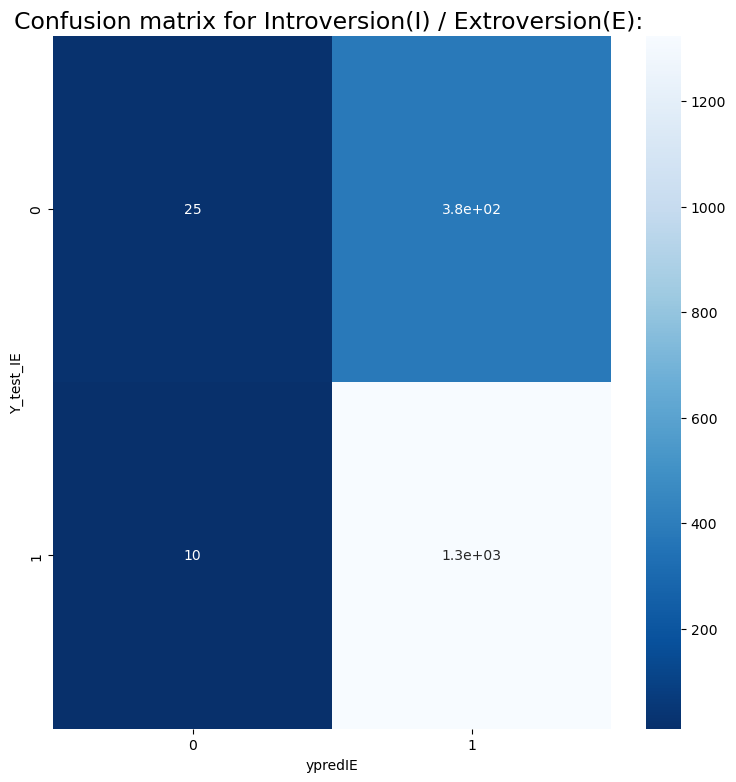

<Figure size 640x480 with 0 Axes>

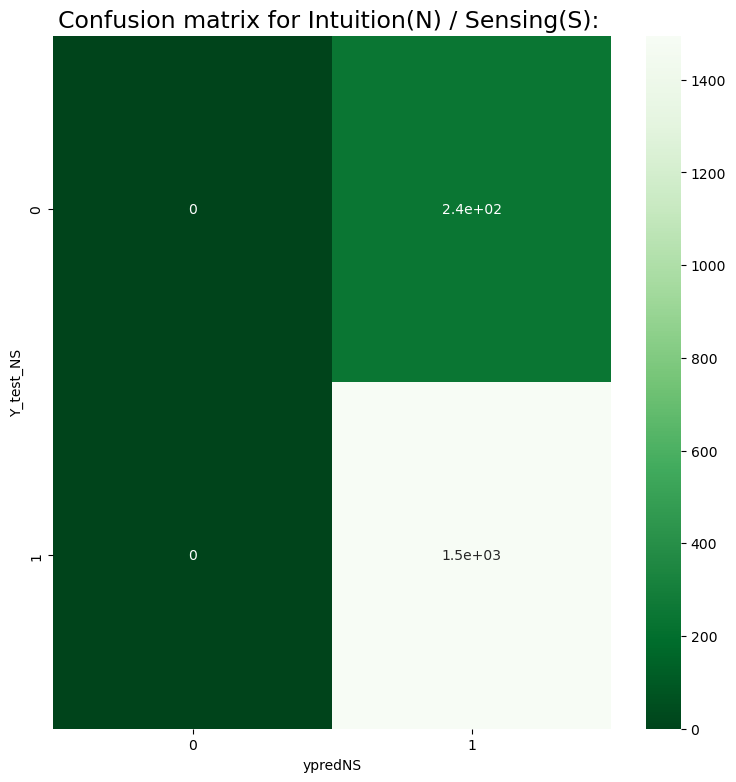

<Figure size 640x480 with 0 Axes>

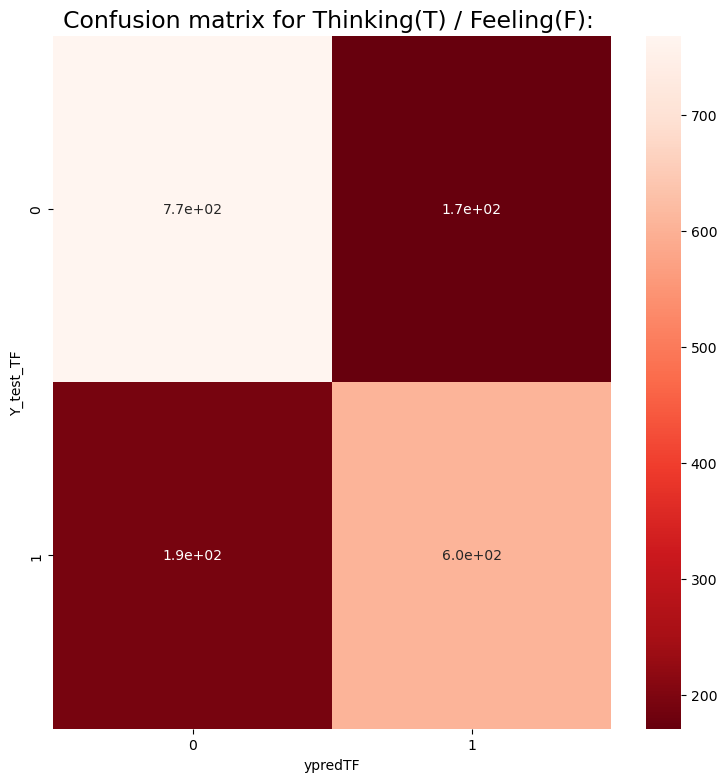

<Figure size 640x480 with 0 Axes>

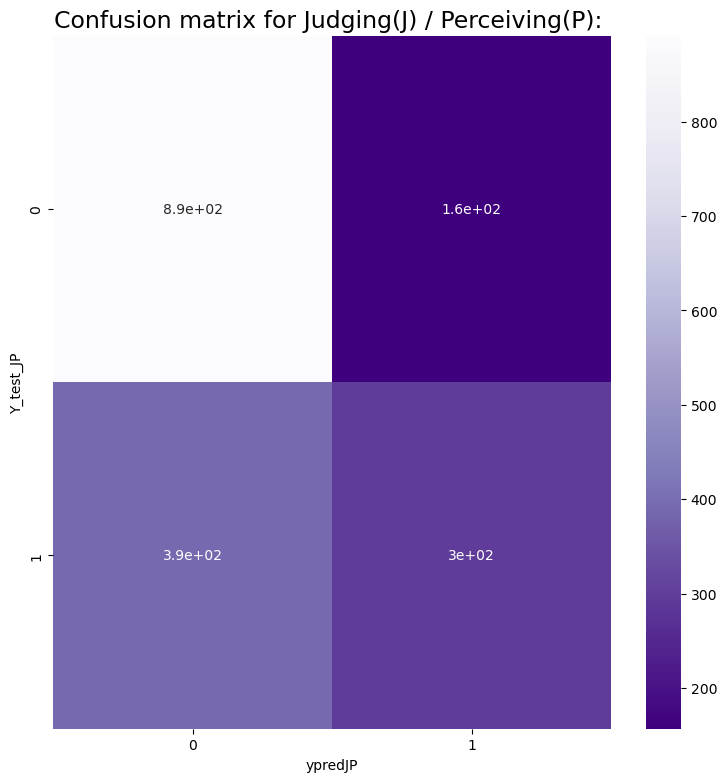

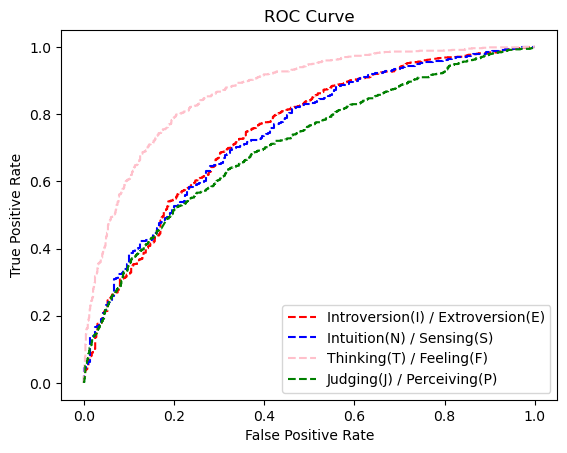

In [64]:
#Plot Confusion Matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

#plot ROC curve
print_roc_auc_curve(svm1.predict_proba(X_test_IE), svm2.predict_proba(X_test_NS),
                    svm3.predict_proba(X_test_TF), svm4.predict_proba(X_test_JP))

# Twitter scraping


In [65]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# user=input("Enter the username: ")

query = "(from:elonmusk) until:2022-11-05 since:2012-01-05 -filter:replies"
tweets = []
limit = 1000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])
        
df = pd.DataFrame(tweets, columns=[ 'posts'])
df["posts"]=df["posts"].str.lower()

In [66]:
data_copy=df

In [67]:
data_copy

posts
0    regarding twitter’s reduction in force, unfort...
1    again, to be crystal clear, twitter’s strong c...
2    excellent summary of twitter’s trust &amp; saf...
3    twitter has had a massive drop in revenue, due...
4    tiny talk is talk so small it feels like it’s ...
..                                                 ...
995  try playing polytopia in your tesla! great gam...
996  change your horn sound to 🐐, 🐍🎷, 💨 or holiday ...
997  merry christmas &amp; happy holidays! 🎁 https:...
998  12 story rocket turns off its engines &amp; do...
999  to tesla owners taking delivery in the final d...

[1000 rows x 1 columns]

In [68]:

for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)
  
  pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
  post_temp=data_copy._get_value(i, 'posts')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\W+')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[0-9]')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing extra spaces from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\s+')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
  data_copy._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
  data_copy._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
  data_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanshumishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
data_new=data_copy.to_numpy()

In [93]:
tweets=data_new[:,0]

In [94]:
tweett=vector.transform(tweets)

In [95]:
log =LogisticRegression(max_iter=500)
#Apply stratified cross validation
grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)
#prediction
# sgd_model= SGDClassifier(loss='log') 
# #Apply cross validation
# grid1=GridSearchCV(sgd_model,{},cv=5)
# grid2=GridSearchCV(sgd_model,{},cv=5)
# grid3=GridSearchCV(sgd_model,{},cv=5)
# grid4=GridSearchCV(sgd_model,{},cv=5)
#IE prediction
ypredIE=grid1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
#NS prediction
ypredNS=grid2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
#TF prediction
ypredTF=grid3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
#JP prediction
ypredJP=grid4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

#Print classificatio report for all four dimensions
# print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

In [96]:
IE1=grid1.predict(tweett)
NS1=grid2.predict(tweett)
TF1=grid3.predict(tweett)
JP1=grid4.predict(tweett)


In [75]:
I_index,N_index,T_index,P_index=np.count_nonzero(IE1), np.count_nonzero(NS1),np.count_nonzero(TF1),np.count_nonzero(JP1)
I_index,N_index,T_index,P_index

(947, 927, 798, 157)

In [97]:
print("The personality type: "),
print(personality_pred(I_index,N_index,T_index,P_index,IE1,NS1,TF1,JP1))

The personality type: 
INTJ


In [98]:
def personality_pred(I_index,N_index,T_index,P_index,IE1,NS1,TF1,JP1):
    personality=""
    if(I_index>(IE1.shape[0]-I_index)):

        personality=personality + "I"
    else:
        personality=personality+ "E"

    if(N_index>(NS1.shape[0]-N_index)):
        personality=personality+"N"
    else:
        personality=personality+"S"
    if(T_index>(TF1.shape[0]-T_index)):
        personality=personality+"T"
    else:
        personality=personality+"F"
    if(P_index>(JP1.shape[0]-P_index)):
        personality=personality+"P"
    else:
        personality=personality+"J"
    return personality

In [99]:
table={'Model Used': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'KNN','SGD','Support Vector Machines'],
        'I/E': [66.22, 78.61, 76.88, 77.11,79.13, 77.75],
      'N/S': [71.98,86.22,86.16,86.28,85.99,89.16],
      'T/F': [74.35,79.07,69.56,61.72,78.32,79.13],
      'J/P': [61.84, 68.06, 60.40, 59.59, 67.60, 68.4]}

In [100]:
dataframe=pd.DataFrame(table)

In [101]:
print("The Accuracy table is: \n")
dataframe

The Accuracy table is: 



Model Used    I/E    N/S    T/F    J/P
0              Naive Bayes  66.22  71.98  74.35  61.84
1      Logistic Regression  78.61  86.22  79.07  68.06
2            Random Forest  76.88  86.16  69.56  60.40
3                      KNN  77.11  86.28  61.72  59.59
4                      SGD  79.13  85.99  78.32  67.60
5  Support Vector Machines  77.75  89.16  79.13  68.40